In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [16]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
else:
    print("Failed to detect a GPU.")

Found a GPU with the name: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [17]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18331835626415782566
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7798259712
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6468096030346286099
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [18]:
df = pd.read_csv('adjprice.csv')

In [19]:
df_1999 = df[df['Date']>19990000]
df_1999

,Date,0111145D US Equity,0202445Q US Equity,0203524D US Equity,0226226D US Equity,0376152D US Equity,0440296D US Equity,0544749D US Equity,0574018D US Equity,0598884D US Equity,...,YNR US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZETHQ US Equity,ZION US Equity,ZRN US Equity,ZTS US Equity,ZTS-W US Equity
1942,19990101,23.2367,24.3347,6.1611,19.2836,5.750,NaN,14.7683,11.9925,59.3125,...,32.2718,123847.8084,6.9436,NaN,NaN,0.26,47.4541,NaN,NaN,NaN
1943,19990102,23.2367,24.3347,6.1611,19.2836,5.750,NaN,14.7683,11.9925,59.3125,...,32.2718,123847.8084,6.9436,NaN,NaN,0.26,47.4541,NaN,NaN,NaN
1944,19990103,23.2367,24.3347,6.1611,19.2836,5.750,NaN,14.7683,11.9925,59.3125,...,32.2718,123847.8084,6.9436,NaN,NaN,0.26,47.4541,NaN,NaN,NaN
1945,19990104,23.1680,24.8719,6.1325,19.3638,5.250,NaN,14.5993,12.0666,59.3125,...,32.0226,117372.1060,6.6665,NaN,NaN,0.28,45.8850,NaN,NaN,NaN
1946,19990105,23.5117,25.1405,6.5604,18.8289,5.375,NaN,14.6476,12.1776,59.3125,...,32.7702,114943.7176,6.7964,NaN,NaN,0.28,45.7423,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,20190727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.0200,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9455,20190728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.0200,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9456,20190729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,114.1000,45.43,134.53,NaN,44.6500,NaN,115.55,NaN
9457,20190730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,113.2400,44.00,136.67,NaN,45.4800,NaN,115.79,NaN


In [20]:
df_1999_na = df_1999.dropna(axis=1)
df_1999_na

,Date,AA US Equity,AAPL US Equity,ABC US Equity,ABMD US Equity,ABT US Equity,ADBE US Equity,ADI US Equity,ADM US Equity,ADP US Equity,...,X US Equity,XEL US Equity,XL US Equity,XLNX US Equity,XOM US Equity,XRAY US Equity,XRX US Equity,YRCW US Equity,YUM US Equity,ZION US Equity
1942,19990101,30.8260,1.2912,6.6778,4.906,13.5822,5.7905,10.9827,9.9134,21.1650,...,17.3643,11.2115,44.5689,11.8589,21.8291,7.6541,112.3198,123847.8084,6.9436,47.4541
1943,19990102,30.8260,1.2912,6.6778,4.906,13.5822,5.7905,10.9827,9.9134,21.1650,...,17.3643,11.2115,44.5689,11.8589,21.8291,7.6541,112.3198,123847.8084,6.9436,47.4541
1944,19990103,30.8260,1.2912,6.6778,4.906,13.5822,5.7905,10.9827,9.9134,21.1650,...,17.3643,11.2115,44.5689,11.8589,21.8291,7.6541,112.3198,123847.8084,6.9436,47.4541
1945,19990104,30.4901,1.3011,7.3584,4.438,13.5129,6.1853,10.5452,9.6240,21.4125,...,17.6946,11.0853,44.6804,12.1435,21.6799,7.6170,112.0818,117372.1060,6.6665,45.8850
1946,19990105,31.1102,1.3662,7.2492,4.625,13.5302,6.0537,10.8514,9.6602,21.2145,...,18.4968,11.1105,44.4575,12.6556,21.4933,7.6913,114.2235,114943.7176,6.7964,45.7423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,20190727,23.1300,207.7400,86.1200,272.660,87.7500,311.2700,121.8000,40.5900,169.2700,...,15.1900,60.5100,57.5900,120.7700,74.8100,56.0200,34.4300,3.3500,114.0200,45.1600
9455,20190728,23.1300,207.7400,86.1200,272.660,87.7500,311.2700,121.8000,40.5900,169.2700,...,15.1900,60.5100,57.5900,120.7700,74.8100,56.0200,34.4300,3.3500,114.0200,45.1600
9456,20190729,23.1200,209.6800,87.2300,275.930,88.5500,307.2200,121.2100,40.9000,167.9100,...,15.2700,60.9800,57.5900,120.5500,75.3400,56.3700,33.9400,3.1800,114.1000,44.6500
9457,20190730,23.0400,208.7800,88.7200,279.230,88.3100,303.6400,120.9600,40.9500,165.0000,...,15.7100,60.5900,57.5900,119.5100,75.3500,56.6700,32.7800,3.1800,113.2400,45.4800


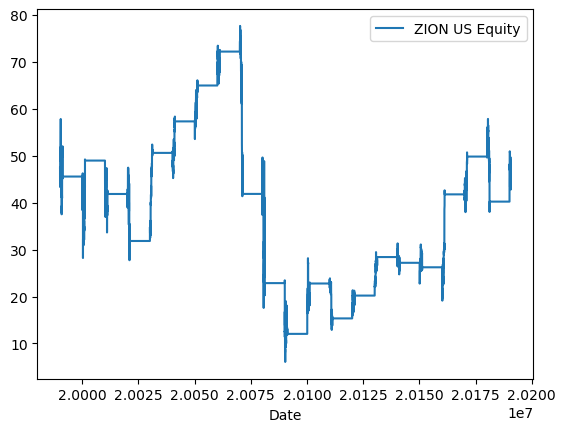

In [21]:
plot = df_1999_na.plot(x='Date', y='ZION US Equity', kind="line")

In [22]:

start_date = 20000101
end_date = 20190601
#investment_dates = []
dates = df_1999_na['Date'].tolist()
'''
for i in range(start_date, end_date + 1):
    for k in range(0, 2500):
        if i == k * 100 + start_date:
            if i in dates:
                investment_dates.append(i)

print(investment_dates)
'''
investment_dates = [20000101, 20000201, 20000301, 20000401, 20000501, 20000601, 20000701, 20000801, 20000901, 20001001, 20001101, 20001201, 20010101, 20010201, 20010301, 20010401, 20010501, 20010601, 20010701, 20010801, 20010901, 20011001, 20011101, 20011201, 20020101, 20020201, 20020301, 20020401, 20020501, 20020601, 20020701, 20020801, 20020901, 20021001, 20021101, 20021201, 20030101, 20030201, 20030301, 20030401, 20030501, 20030601, 20030701, 20030801, 20030901, 20031001, 20031101, 20031201, 20040101, 20040201, 20040301, 20040401, 20040501, 20040601, 20040701, 20040801, 20040901, 20041001, 20041101, 20041201, 20050101, 20050201, 20050301, 20050401, 20050501, 20050601, 20050701, 20050801, 20050901, 20051001, 20051101, 20051201, 20060101, 20060201, 20060301, 20060401, 20060501, 20060601, 20060701, 20060801, 20060901, 20061001, 20061101, 20061201, 20070101, 20070201, 20070301, 20070401, 20070501, 20070601, 20070701, 20070801, 20070901, 20071001, 20071101, 20071201, 20080101, 20080201, 20080301, 20080401, 20080501, 20080601, 20080701, 20080801, 20080901, 20081001, 20081101, 20081201, 20090101, 20090201, 20090301, 20090401, 20090501, 20090601, 20090701, 20090801, 20090901, 20091001, 20091101, 20091201, 20100101, 20100201, 20100301, 20100401, 20100501, 20100601, 20100701, 20100801, 20100901, 20101001, 20101101, 20101201, 20110101, 20110201, 20110301, 20110401, 20110501, 20110601, 20110701, 20110801, 20110901, 20111001, 20111101, 20111201, 20120101, 20120201, 20120301, 20120401, 20120501, 20120601, 20120701, 20120801, 20120901, 20121001, 20121101, 20121201, 20130101, 20130201, 20130301, 20130401, 20130501, 20130601, 20130701, 20130801, 20130901, 20131001, 20131101, 20131201, 20140101, 20140201, 20140301, 20140401, 20140501, 20140601, 20140701, 20140801, 20140901, 20141001, 20141101, 20141201, 20150101, 20150201, 20150301, 20150401, 20150501, 20150601, 20150701, 20150801, 20150901, 20151001, 20151101, 20151201, 20160101, 20160201, 20160301, 20160401, 20160501, 20160601, 20160701, 20160801, 20160901, 20161001, 20161101, 20161201, 20170101, 20170201, 20170301, 20170401, 20170501, 20170601, 20170701, 20170801, 20170901, 20171001, 20171101, 20171201, 20180101, 20180201, 20180301, 20180401, 20180501, 20180601, 20180701, 20180801, 20180901, 20181001, 20181101, 20181201, 20190101, 20190201, 20190301, 20190401, 20190501, 20190601]
investment_dates_5_years = investment_dates[173:]
investment_dates_10_years = investment_dates[113:]
investment_dates_19_years = investment_dates[5:]
investment_dates_1_year = investment_dates[221:]
full_time = investment_dates

In [23]:
len(investment_dates)

234

Investment in and out code

In [24]:
def investing_selling(investment_dates, number_of_companies):
    money_made_over_time = []
    avg_return_over_time = []
    total_money = 5000
    number_of_companies = number_of_companies
    for date in investment_dates:
        invest_date_index = investment_dates.index(date)
        selling_date_index = invest_date_index + 1
        if selling_date_index < len(investment_dates):
            invest_date = investment_dates[invest_date_index]
            selling_date = investment_dates[selling_date_index]
            chosen_companies = companies_chosen(invest_date,selling_date,number_of_companies)
            money_to_invest = total_money / len(chosen_companies)
            money_to_invest = money_to_invest - (0.0012*money_to_invest) #add a fee to invest
            start_date_row = df_1999_na.loc[df_1999_na['Date'] == invest_date]
            end_date_row = df_1999_na.loc[df_1999_na['Date'] == selling_date]
            start_companies_date_stock = start_date_row[chosen_companies].reset_index(drop=True)
            end_companies_date_stock = end_date_row[chosen_companies].reset_index(drop=True)
            money_made = (money_to_invest/start_companies_date_stock) * end_companies_date_stock
            total_money = money_made.sum().sum()
            money_made_over_time.append(total_money)

            money_made_over_time_df = pd.DataFrame({'returns': money_made_over_time})
            money_made_over_time_df = money_made_over_time_df.dropna()
            if len(money_made_over_time_df) >= 2:
                money_made_over_time_df = money_made_over_time_df[-2:]
                percentage_change = money_made_over_time_df['returns'].pct_change()
                percentage_change_df = percentage_change.to_frame(name='returns')
                percentage_change_df = percentage_change_df.dropna()
                avg_return_over_time.append(percentage_change_df['returns'].iloc[-1])
            if total_money <= 0:
                print('You broke!')
                break
    
    print('Total money:', total_money)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(money_made_over_time) + 1), money_made_over_time, linestyle='-', marker='o', color='b')
    plt.xlabel('Months')
    plt.ylabel('Amount of Money ($)')
    plt.title('Money Made Over Time')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(avg_return_over_time) + 1), avg_return_over_time, linestyle='-', marker='o', color='b')
    plt.xlabel('Months')
    plt.ylabel('Growth')
    plt.title('Growth for the month Over Time')
    plt.grid(True)
    plt.show()
    
    money_made_over_time_df = pd.DataFrame({'returns': money_made_over_time})
    money_made_over_time_df = money_made_over_time_df.dropna()
    percentage_change = money_made_over_time_df['returns'].pct_change()
    percentage_change = percentage_change.dropna()
    avg_return = percentage_change.mean()
    print('average monthly growth:', avg_return)
    std_dev = percentage_change.std()
    print('average monthly growth standard deviation:', std_dev)

Select companies based on investment output

In [25]:
def companies_chosen(invest_date,selling_date,number_of_companies):
    number_of_companies = n
    invest_date = invest_date
    selling_date = selling_date
    stock_predictions = predict_stock(invest_date,selling_date)
    stock_at_invest = df_1999_na[df_1999_na['Date'] == invest_date]
    stock_at_invest = stock_at_invest.drop(columns = ['Date'])
    stock_increase_percent = (stock_predictions - stock_at_invest) / stock_at_invest * 100
    largest_column_names = stock_increase_percent.iloc[0].nlargest(n).index.tolist()
    return largest_column_names

Predict stock price for companies and the store in list

In [26]:
def predict_stock(invest_date, selling_date):
    stock_predictions = []
    df_1999_na.reset_index(drop=True, inplace=True)
    index_selling = df_1999_na[df_1999_na['Date'] == selling_date].index[0]
    index_invest = df_1999_na[df_1999_na['Date'] == invest_date].index[0]
    prediction_df = df_1999_na.reset_index(drop=False)  # Reset index and keep it as a column
    prediction_df = prediction_df.rename(columns={'index': 'DateNum'})
    prediction_value = prediction_df.loc[index_selling, 'DateNum']
    data = prediction_df.drop(columns=['Date', 'DateNum'])
    data = data.reset_index(drop=True)
    data_columns = data.columns.tolist()
    for column in data_columns:
        if column != 'Date':
            data_values = data[column]
            data_values = data_values.reset_index(drop=False)  # Reset index and keep it as a column
            data_values = data_values.rename(columns={'index': 'Date'})
            X = data_values[index_invest - 365:index_invest + 1] # Use all data up to the investing point
            X = X['Date'].values.reshape(-1, 1)
            y = data_values[index_invest - 365:index_invest + 1]
            y = y.drop(columns = ['Date']).values
            # Train the linear regression model
            model = LinearRegression()
            model.fit(X, y)  # Using all data up to the invest date for training
            # Predict the value at selling date
            prediction = model.predict([[prediction_value]])[0][0]  # Predict based on the value at selling date
            stock_predictions.append(prediction)
    return stock_predictions

3 companies chosen
investment_dates_1_year
Total money: 3410.4955991501347


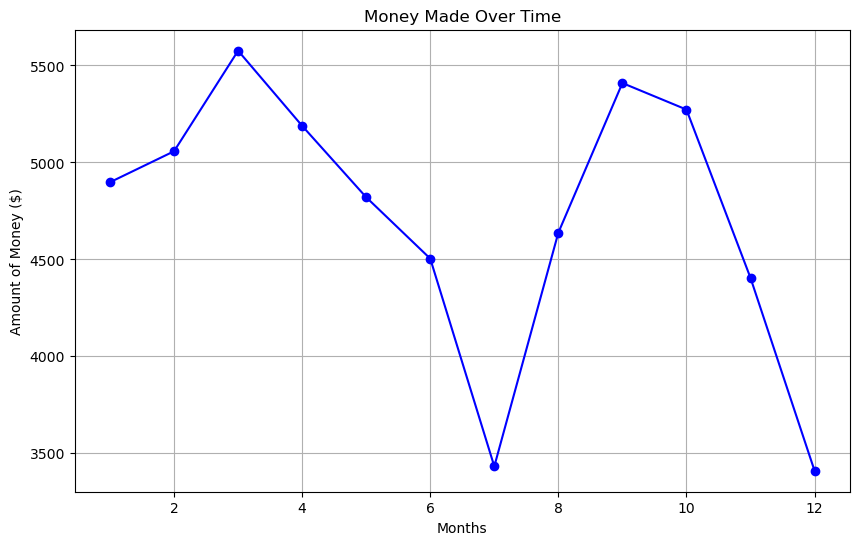

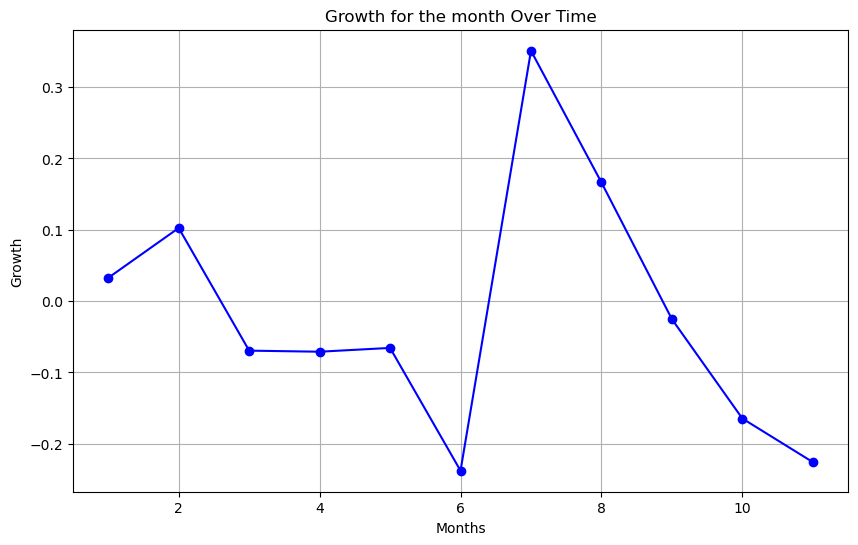

average monthly growth: -0.018821184842227178
average monthly growth standard deviation: 0.17548351592918318
investment_dates_5_years
Total money: 4429.293110417981


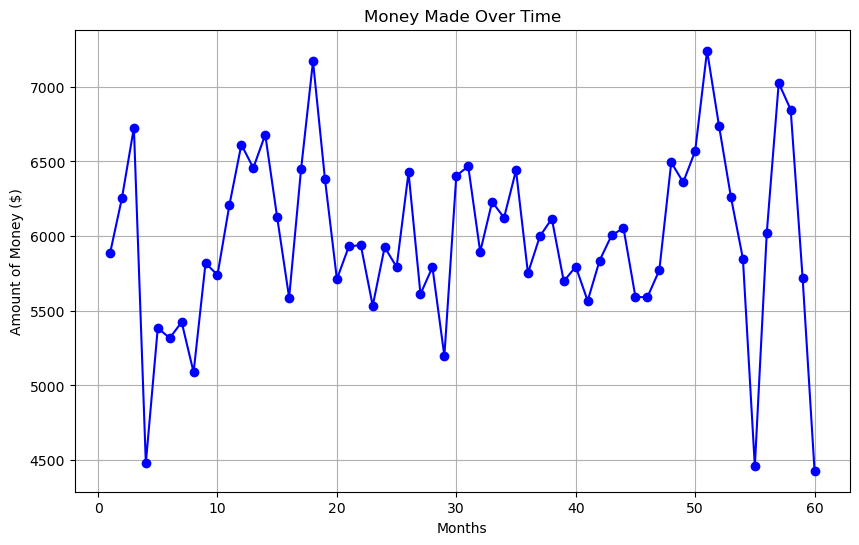

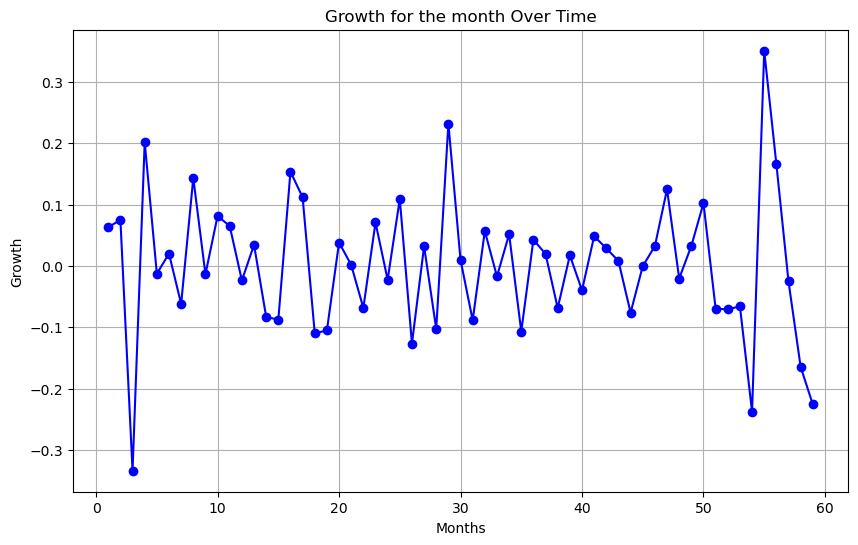

average monthly growth: 0.0017086190805985003
average monthly growth standard deviation: 0.1138001283488835
investment_dates_10_years
Total money: 15678.884294266003


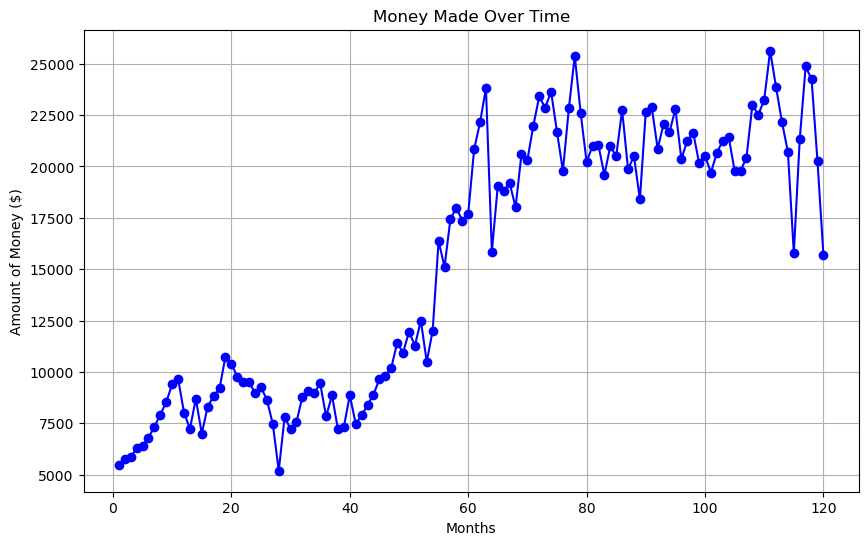

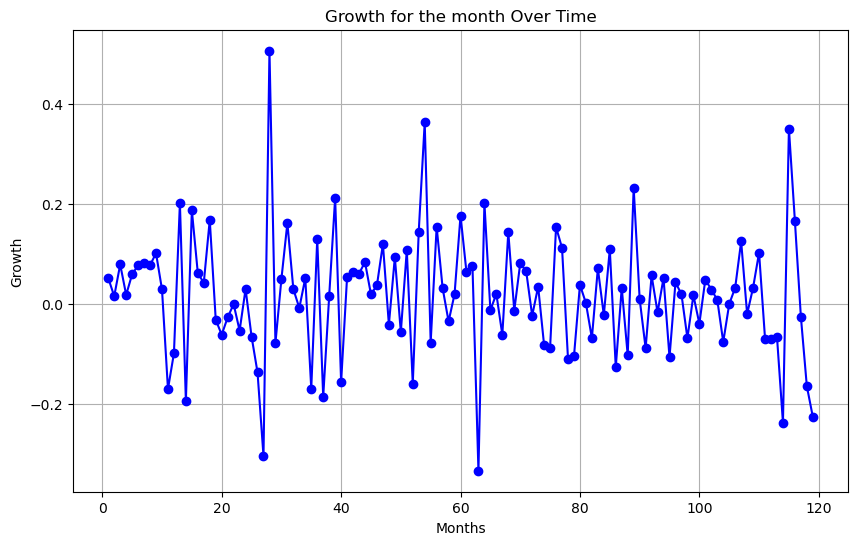

average monthly growth: 0.016417615456572787
average monthly growth standard deviation: 0.12419792264055006
investment_dates_19_years
Total money: 98594.8245416838


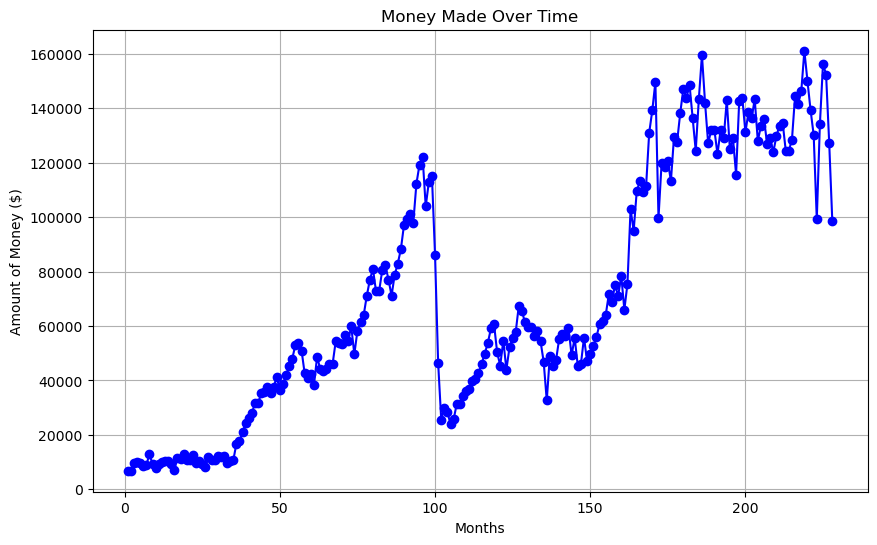

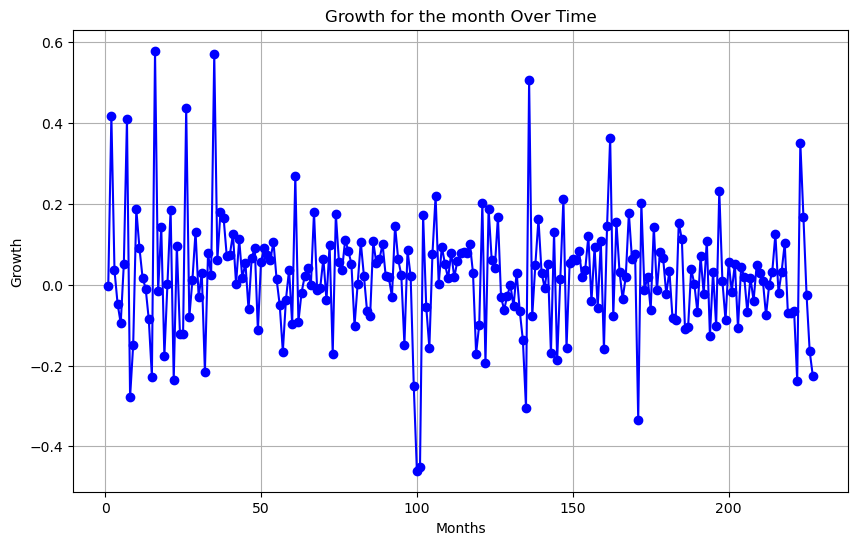

average monthly growth: 0.02177369513081212
average monthly growth standard deviation: 0.14203490367653526
5 companies chosen
investment_dates_1_year
Total money: 3496.4442574843924


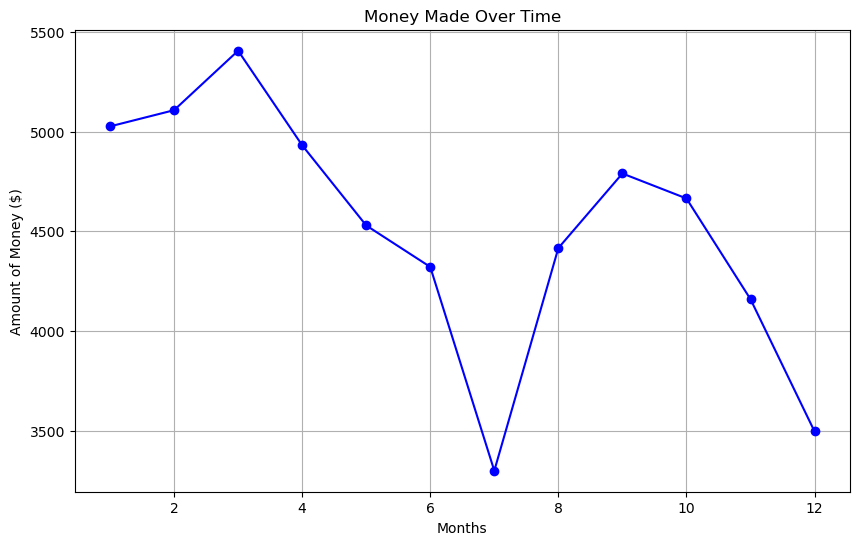

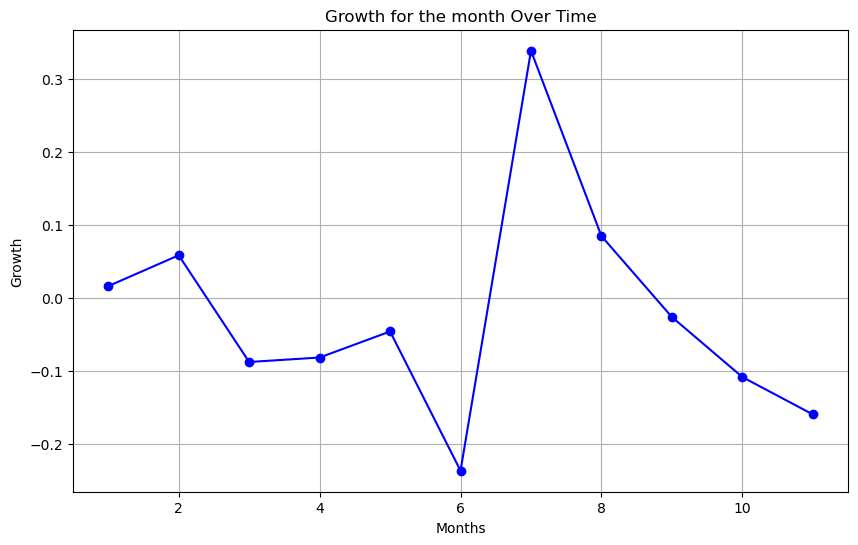

average monthly growth: -0.02253035764047588
average monthly growth standard deviation: 0.15162290468220718
investment_dates_5_years
Total money: 4637.864423444547


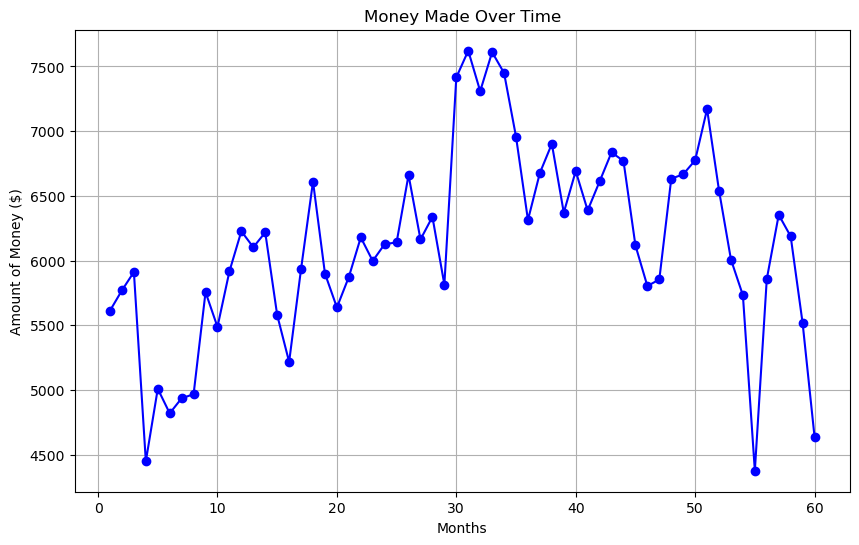

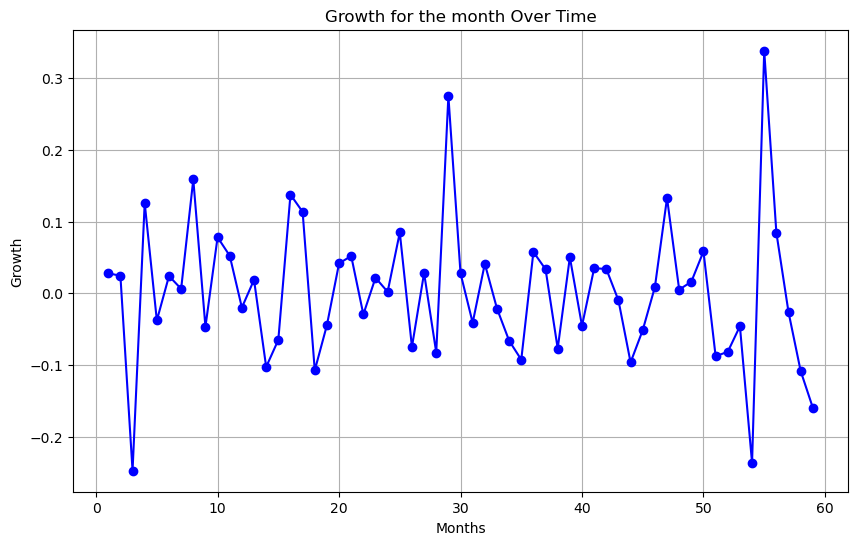

average monthly growth: 0.001605070347051468
average monthly growth standard deviation: 0.09996743912991594
investment_dates_10_years
Total money: 25342.062493815014


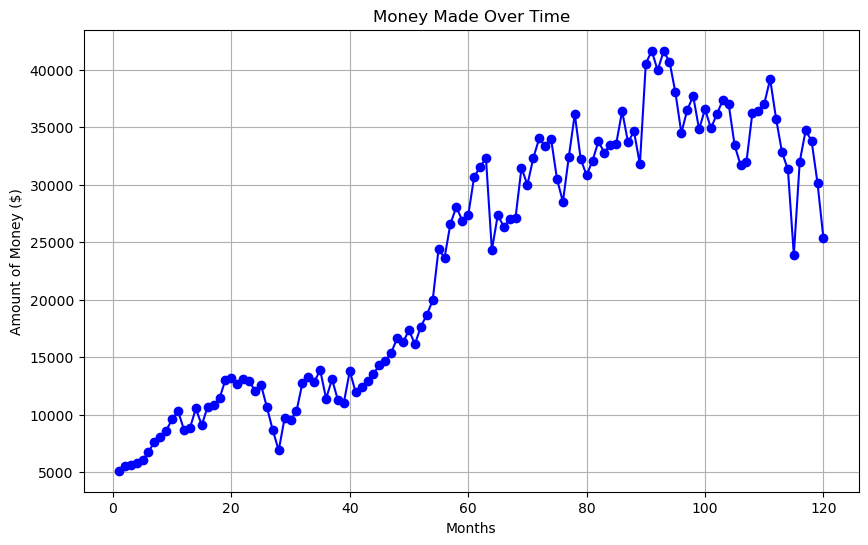

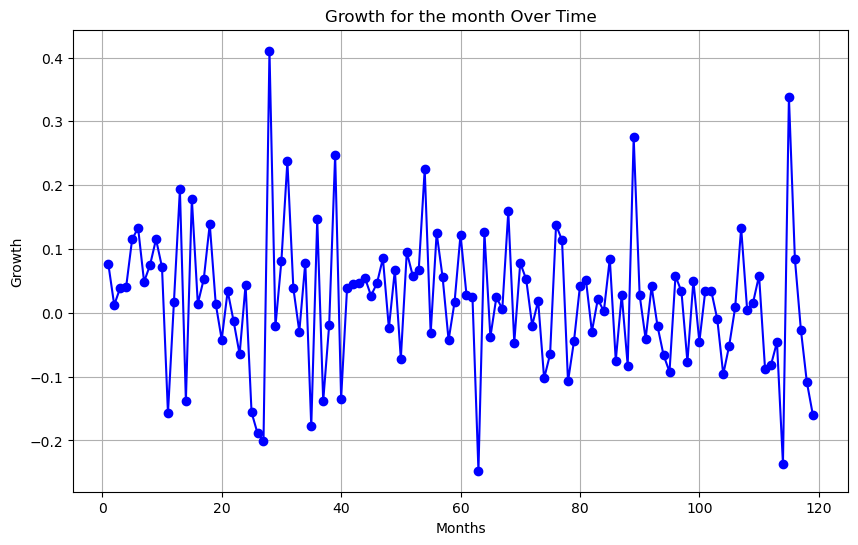

average monthly growth: 0.01912946180823922
average monthly growth standard deviation: 0.10792962831508712
investment_dates_19_years
Total money: 201000.5041625587


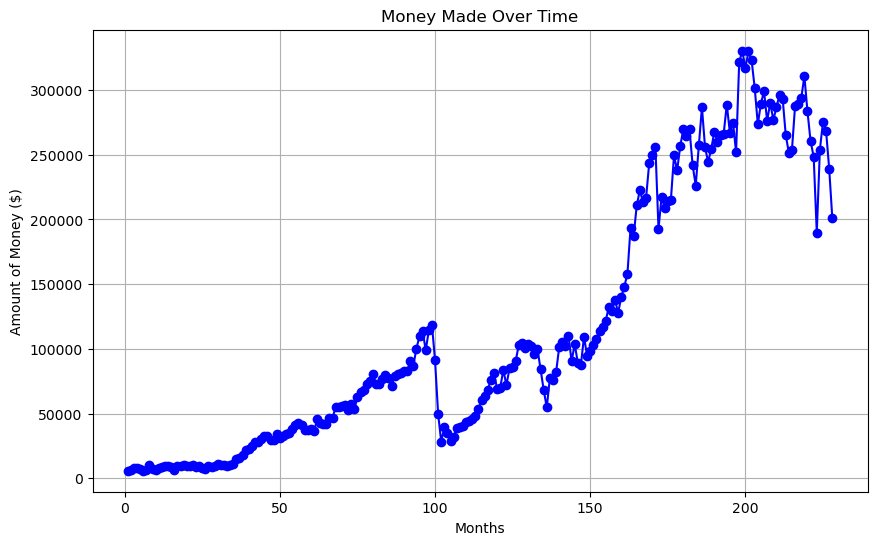

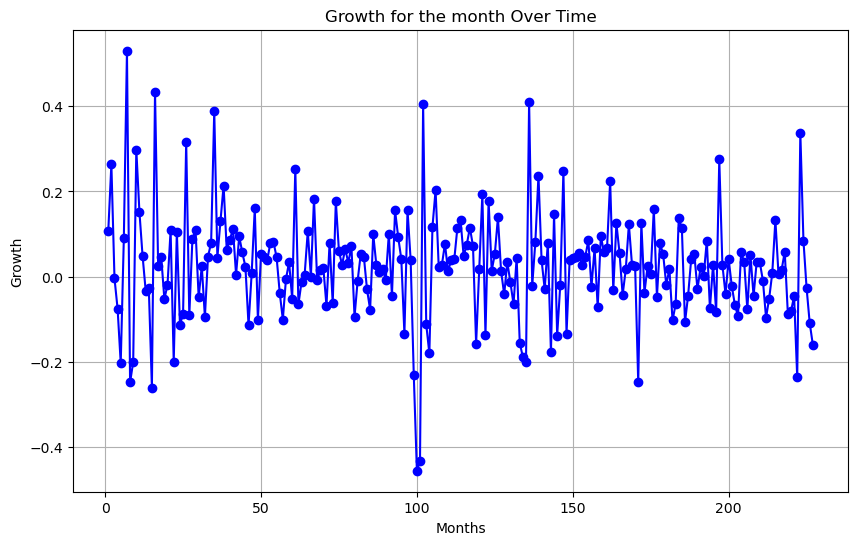

average monthly growth: 0.023963513219385425
average monthly growth standard deviation: 0.1291509751561957
10 companies chosen
investment_dates_1_year
Total money: 3525.135562154931


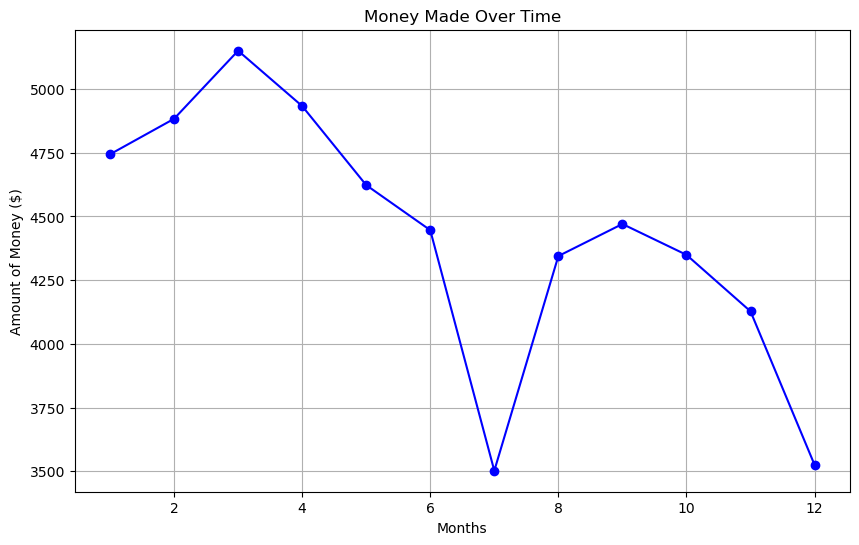

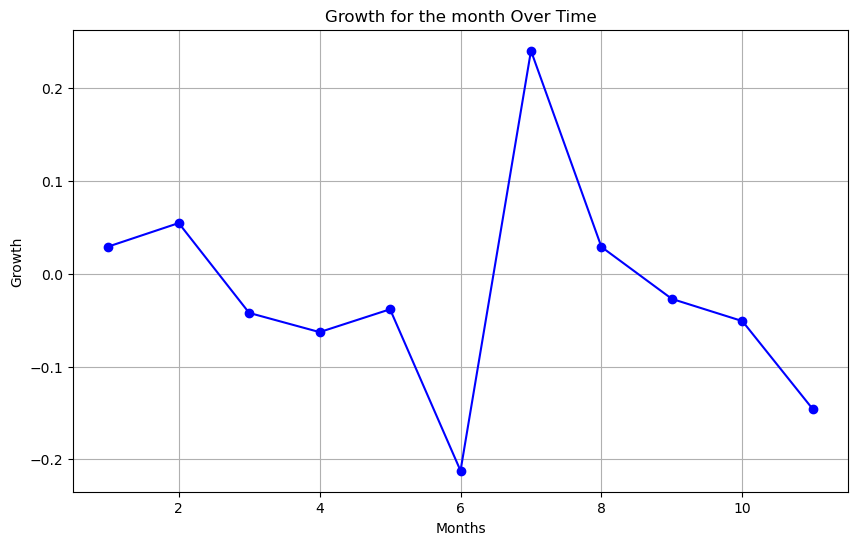

average monthly growth: -0.020546804717105186
average monthly growth standard deviation: 0.11611442024678195
investment_dates_5_years
Total money: 4093.55569517973


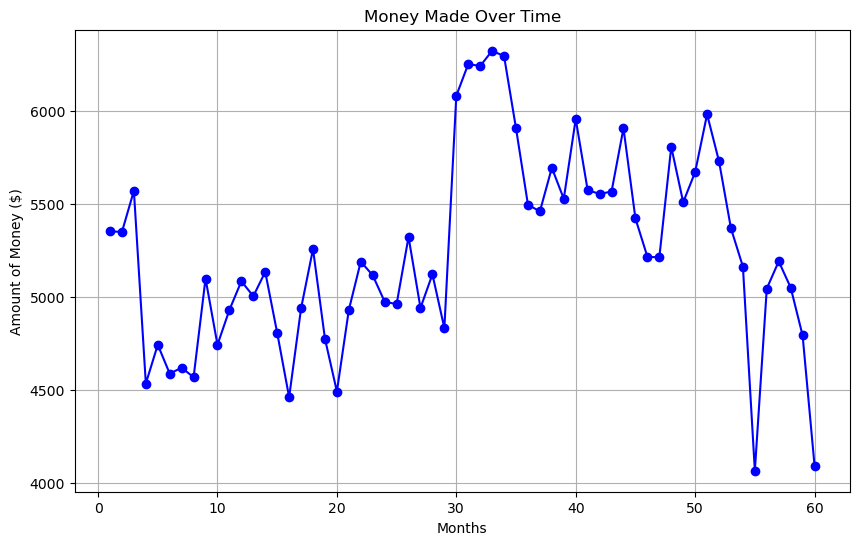

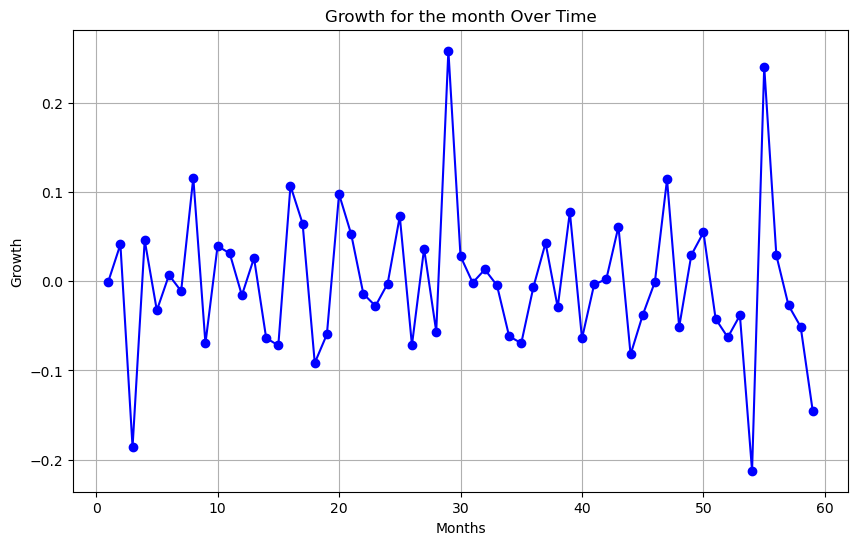

average monthly growth: -0.0013347100586106858
average monthly growth standard deviation: 0.08119834413647416
investment_dates_10_years
Total money: 22424.882882595826


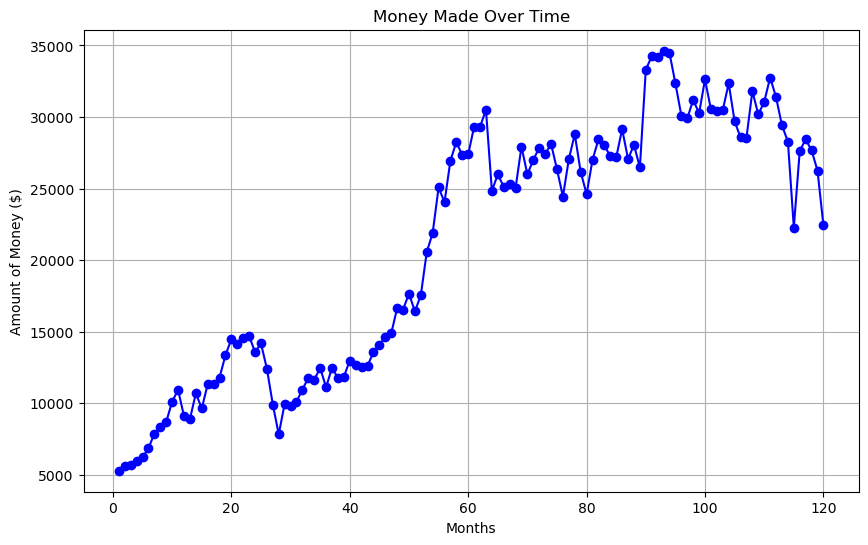

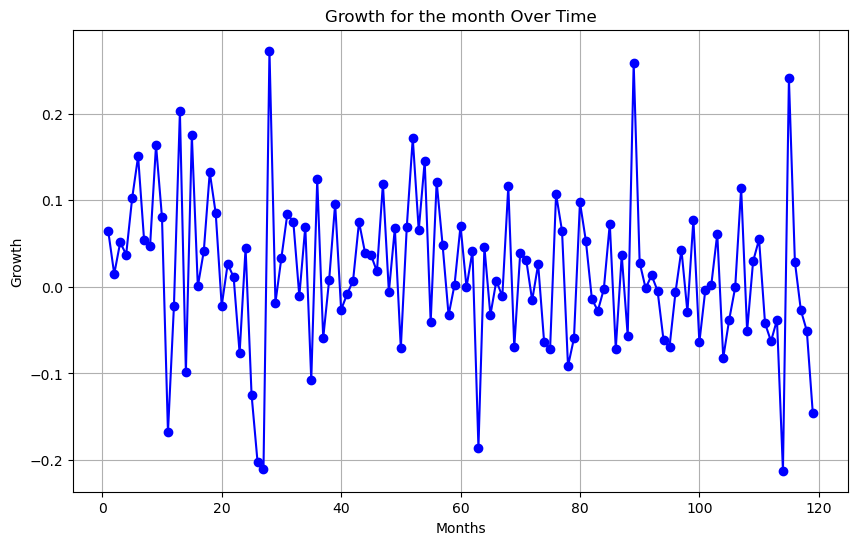

average monthly growth: 0.01610136766948429
average monthly growth standard deviation: 0.08868680335509259
investment_dates_19_years
Total money: 77180.15682986651


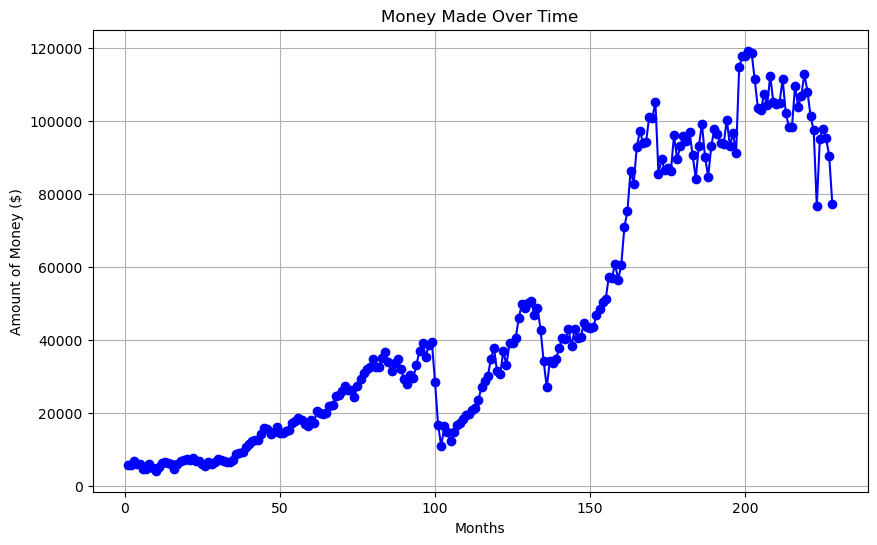

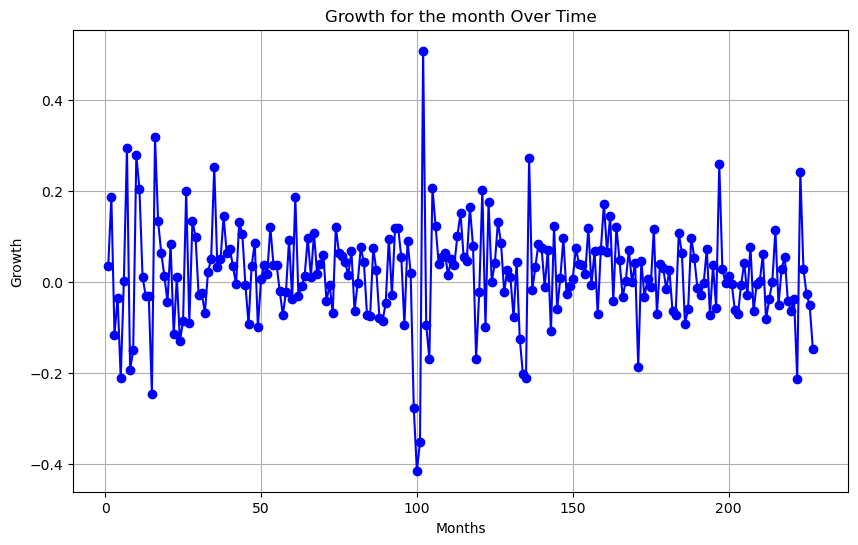

average monthly growth: 0.017663989527912066
average monthly growth standard deviation: 0.10895615755274508
20 companies chosen
investment_dates_1_year
Total money: 3771.8016860024845


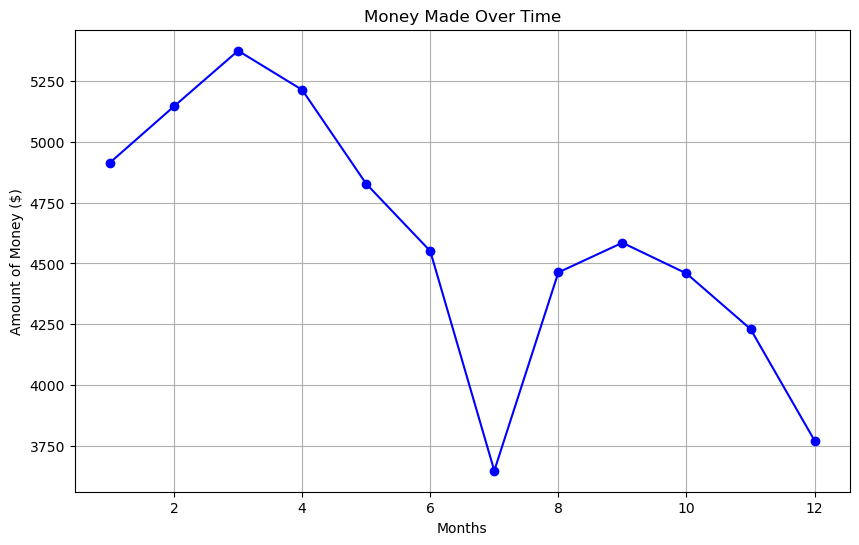

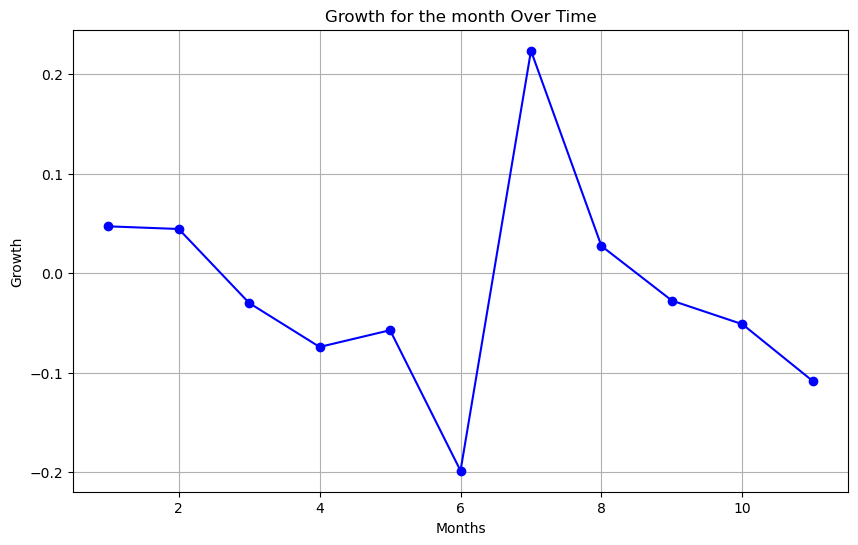

average monthly growth: -0.018599712732409204
average monthly growth standard deviation: 0.10737918610946705
investment_dates_5_years
Total money: 4764.5119700303185


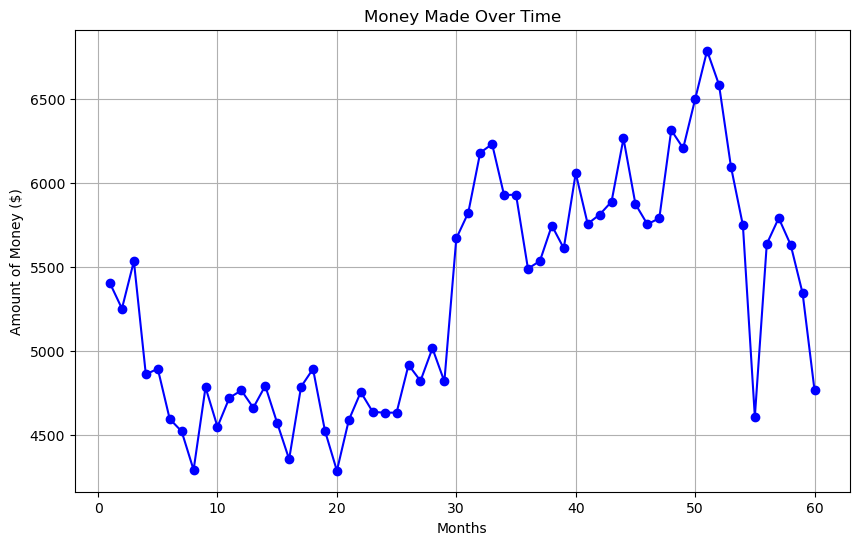

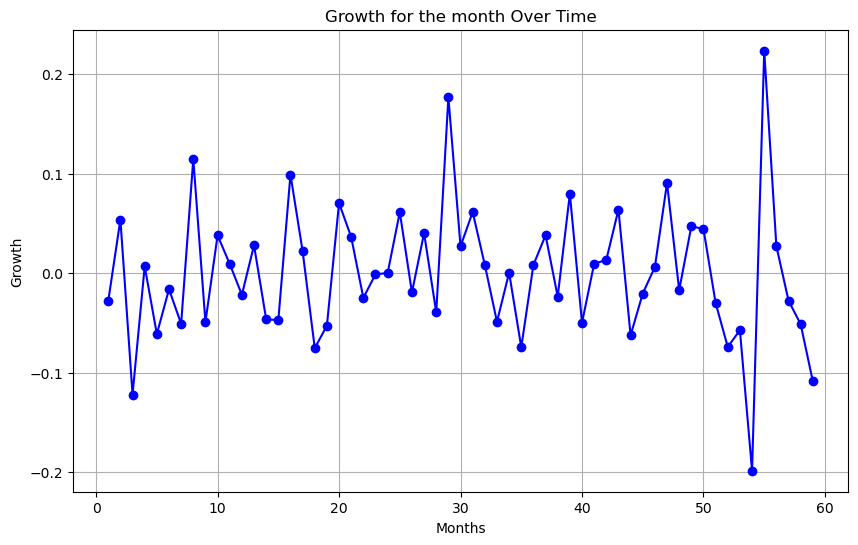

average monthly growth: 0.00015137944486949008
average monthly growth standard deviation: 0.06846948183842627
investment_dates_10_years
Total money: 21327.112487814375


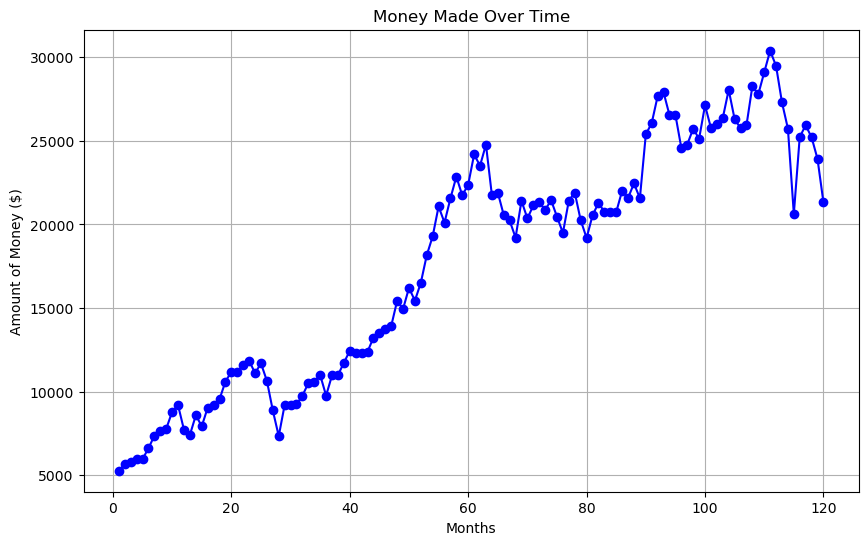

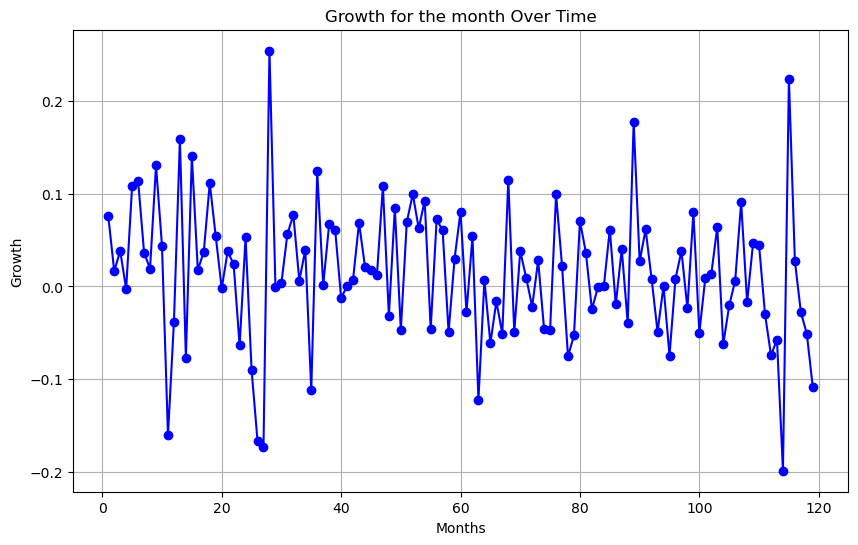

average monthly growth: 0.014562716352435915
average monthly growth standard deviation: 0.0745644195260752
investment_dates_19_years
Total money: 71929.46725910426


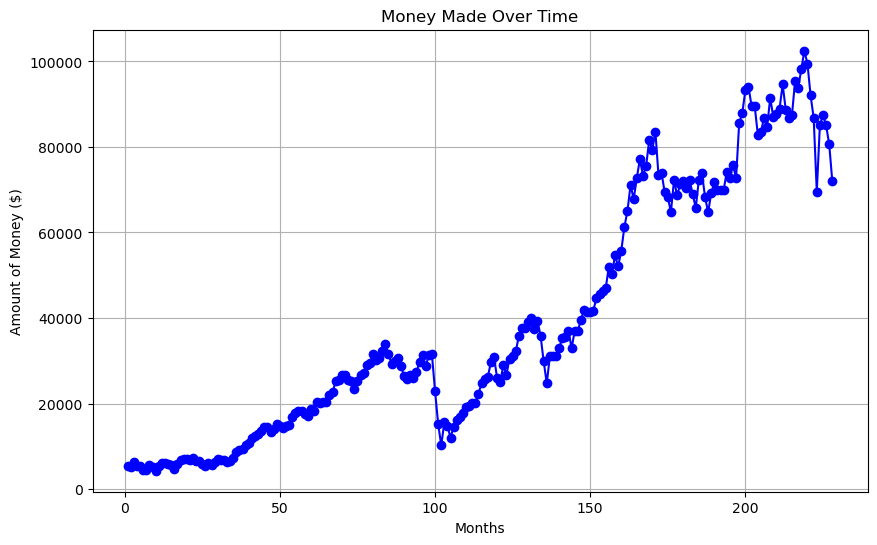

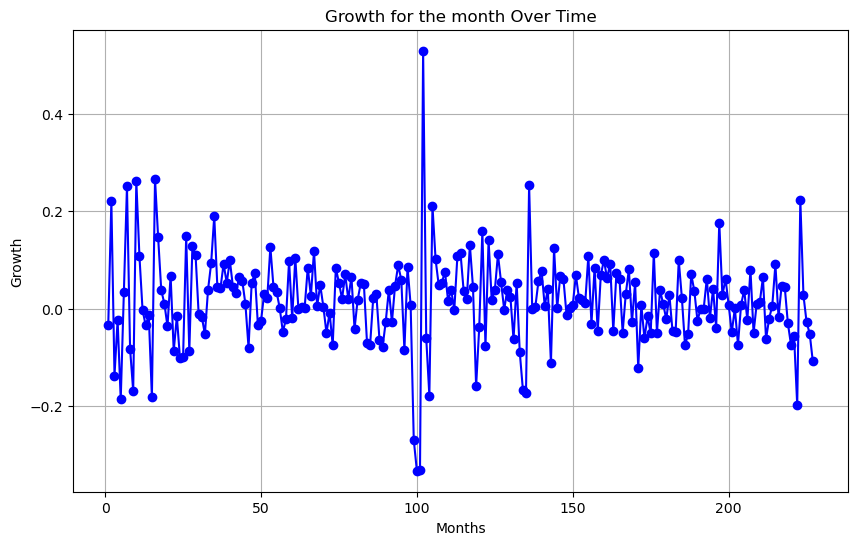

average monthly growth: 0.01597846139659328
average monthly growth standard deviation: 0.09540530433673296


In [27]:
investment_total_dates = []
names = ['investment_dates_1_year','investment_dates_5_years','investment_dates_10_years', 'investment_dates_19_years', 'full_time']
investment_total_dates.append(investment_dates_1_year)
investment_total_dates.append(investment_dates_5_years)
investment_total_dates.append(investment_dates_10_years)
investment_total_dates.append(investment_dates_19_years)
company_numbers = [3,5,10,20]
for n in company_numbers:
    print(n, 'companies chosen')
    counter = 0
    for i in investment_total_dates:
        print(names[counter])
        counter+=1
        investing_selling(i,n)

In [28]:
'''
#this invests every day, will take a long time to run, so don't unless you want too
investing_selling(dates)
'''

"\n#this invests every day, will take a long time to run, so don't unless you want too\ninvesting_selling(dates)\n"

The following are functions to find the monthly growth

In [29]:
initial_amount = 5000
total_months = 228
total_amount = initial_amount * (1.049348706333753656 ** total_months)
print("Total amount after 19 years:", total_amount)

Total amount after 19 years: 294233131.4616566


In [30]:
def calculate_growth_rate(initial_amount, target_amount, total_months):
    # Calculate the growth rate needed to reach the target amount
    growth_rate = (target_amount / initial_amount) ** (1 / total_months)
    return growth_rate

In [31]:
calculate_growth_rate(5000,52428.96886398304 , 234)

1.010093424777376

In [32]:
filtered_df = df_1999_na[df_1999_na['Date'] == 20000101]
filtered_df

,Date,AA US Equity,AAPL US Equity,ABC US Equity,ABMD US Equity,ABT US Equity,ADBE US Equity,ADI US Equity,ADM US Equity,ADP US Equity,...,X US Equity,XEL US Equity,XL US Equity,XLNX US Equity,XOM US Equity,XRAY US Equity,XRX US Equity,YRCW US Equity,YUM US Equity,ZION US Equity
365,20000101,69.6429,3.2429,3.1206,18.375,10.2149,16.6977,32.5543,7.4747,28.6499,...,25.8487,8.4109,31.8157,33.1185,24.577,7.0897,44.0023,108872.7466,5.3505,45.5787


The following is how the S&P500 as a whole has changed

In [33]:
#https://www.kaggle.com/datasets/henryhan117/sp-500-historical-data?resource=download
spx = pd.read_csv('SPX.csv')

In [34]:
#note that some dates are missing, because this dataset only has the data of when the market is open
spx = spx[['Date', 'Open']]
spx = spx[spx['Date']>'2000-01-01']
spx = spx[spx['Date']<'2019-06-01']
spx

,Date,Open
18078,2000-01-03,1469.250000
18079,2000-01-04,1455.219971
18080,2000-01-05,1399.420044
18081,2000-01-06,1402.109985
18082,2000-01-07,1403.449951
...,...,...
22956,2019-05-24,2832.409912
22957,2019-05-28,2830.030029
22958,2019-05-29,2790.250000
22959,2019-05-30,2786.939941


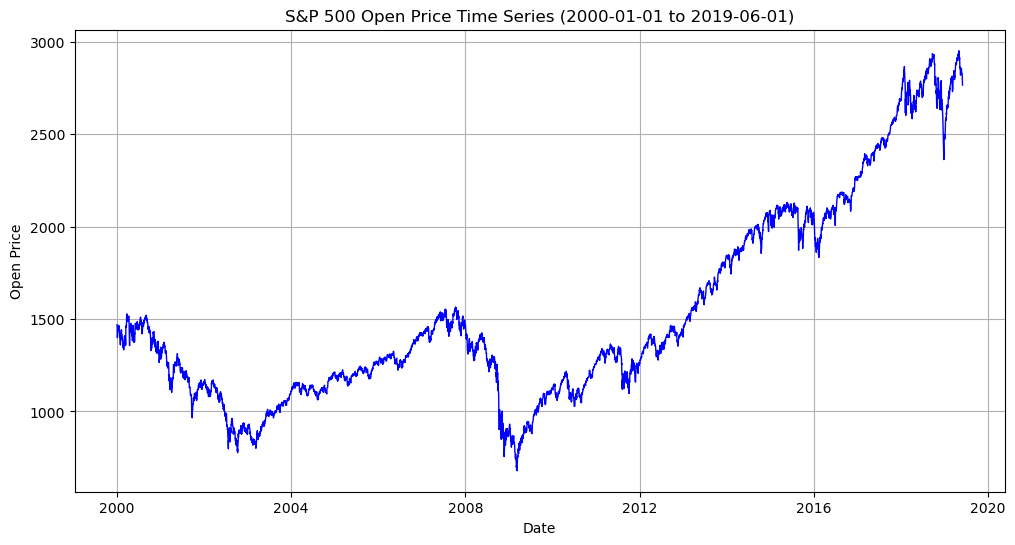

In [35]:
spx['Date'] = pd.to_datetime(spx['Date'])
spx.set_index('Date', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(spx.index, spx['Open'], color='blue', linewidth=1)
plt.title('S&P 500 Open Price Time Series (2000-01-01 to 2019-06-01)')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid(True)
plt.show()

In [36]:
calculate_growth_rate(1469.250000,2766.149902, 234)

1.0027075235245584

If you used our current monthly model for 19.5 years, it has a monthly average growth of 1.010093424777376, compared to the S&P500 which had a monthly growth of 1.0027075235245584. This means that this model greatly outperforms the S&P, in terms of returns.

The following will be using decision tree regression to predict

In [37]:
def investing_selling_decision_tree(investment_dates, number_of_companies):
    money_made_over_time = []
    avg_return_over_time = []
    total_money = 5000
    number_of_companies = number_of_companies
    for date in investment_dates:
        invest_date_index = investment_dates.index(date)
        selling_date_index = invest_date_index + 1
        if selling_date_index < len(investment_dates):
            invest_date = investment_dates[invest_date_index]
            selling_date = investment_dates[selling_date_index]
            chosen_companies = companies_chosen_decision_tree(invest_date,selling_date,number_of_companies)
            money_to_invest = total_money / len(chosen_companies)
            money_to_invest = money_to_invest - (0.0012*money_to_invest) #add a fee to invest
            start_date_row = df_1999_na.loc[df_1999_na['Date'] == invest_date]
            end_date_row = df_1999_na.loc[df_1999_na['Date'] == selling_date]
            start_companies_date_stock = start_date_row[chosen_companies].reset_index(drop=True)
            end_companies_date_stock = end_date_row[chosen_companies].reset_index(drop=True)
            money_made = (money_to_invest/start_companies_date_stock) * end_companies_date_stock
            total_money = money_made.sum().sum()
            money_made_over_time.append(total_money)
            money_made_over_time_df = pd.DataFrame({'returns': money_made_over_time})
            money_made_over_time_df = money_made_over_time_df.dropna()
            if len(money_made_over_time_df) >= 2:
                money_made_over_time_df = money_made_over_time_df[-2:]
                percentage_change = money_made_over_time_df['returns'].pct_change()
                percentage_change_df = percentage_change.to_frame(name='returns')
                percentage_change_df = percentage_change_df.dropna()
                avg_return_over_time.append(percentage_change_df['returns'].iloc[-1])
            if total_money <= 0:
                print('You broke!')
                break
    
    print('Total money:', total_money)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(money_made_over_time) + 1), money_made_over_time, linestyle='-', marker='o', color='b')
    plt.xlabel('Months')
    plt.ylabel('Amount of Money ($)')
    plt.title('Money Made Over Time')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(avg_return_over_time) + 1), avg_return_over_time, linestyle='-', marker='o', color='b')
    plt.xlabel('Months')
    plt.ylabel('Growth')
    plt.title('Growth for the month Over Time')
    plt.grid(True)
    plt.show()
    
    money_made_over_time_df = pd.DataFrame({'returns': money_made_over_time})
    money_made_over_time_df = money_made_over_time_df.dropna()
    percentage_change = money_made_over_time_df['returns'].pct_change()
    percentage_change = percentage_change.dropna()
    avg_return = percentage_change.mean()
    print('average monthly growth:', avg_return)
    std_dev = percentage_change.std()
    print('average monthly growth standard deviation:', std_dev)

In [38]:
def companies_chosen_decision_tree(invest_date,selling_date,number_of_companies):
    number_of_companies = n
    invest_date = invest_date
    selling_date = selling_date
    stock_predictions = predict_stock_decision_tree(invest_date,selling_date)
    stock_at_invest = df_1999_na[df_1999_na['Date'] == invest_date]
    stock_at_invest = stock_at_invest.drop(columns = ['Date'])
    stock_increase_percent = (stock_predictions - stock_at_invest) / stock_at_invest * 100
    largest_column_names = stock_increase_percent.iloc[0].nlargest(n).index.tolist()
    return largest_column_names

In [39]:
def predict_stock_decision_tree(invest_date, selling_date):
    stock_predictions = []
    df_1999_na.reset_index(drop=True, inplace=True)
    index_selling = df_1999_na[df_1999_na['Date'] == selling_date].index[0]
    index_invest = df_1999_na[df_1999_na['Date'] == invest_date].index[0]
    prediction_df = df_1999_na.reset_index(drop=False)  # Reset index and keep it as a column
    prediction_df = prediction_df.rename(columns={'index': 'DateNum'})
    prediction_value = prediction_df.loc[index_selling, 'DateNum']
    data = prediction_df.drop(columns=['Date', 'DateNum'])
    data = data.reset_index(drop=True)
    data_columns = data.columns.tolist()
    for column in data_columns:
        if column != 'Date':
            data_values = data[column]
            data_values = data_values.reset_index(drop=False)  # Reset index and keep it as a column
            data_values = data_values.rename(columns={'index': 'Date'})
            X = data_values[index_invest - 365:index_invest + 1] # Use all data up to the investing point
            X = X['Date'].values.reshape(-1, 1)
            y = data_values[index_invest - 365:index_invest + 1]
            y = y.drop(columns = ['Date']).values
            # Train the linear regression model
            model = DecisionTreeRegressor()
            model.fit(X, y)  # Using all data up to the invest date for training
            # Predict the value at selling date
            prediction = model.predict([[prediction_value]])[0]# Predict based on the value at selling date
            stock_predictions.append(prediction)
    return stock_predictions

5 companies chosen
investment_dates_1_year
Total money: 4398.507097753938


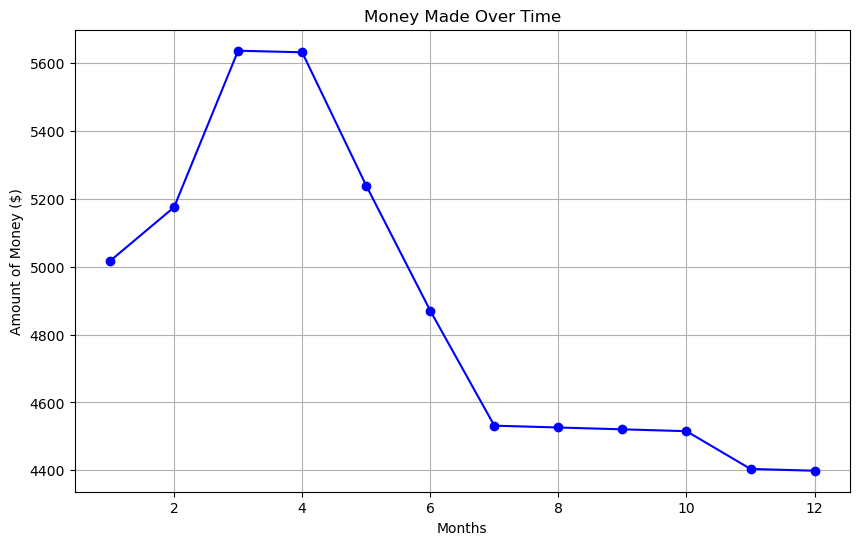

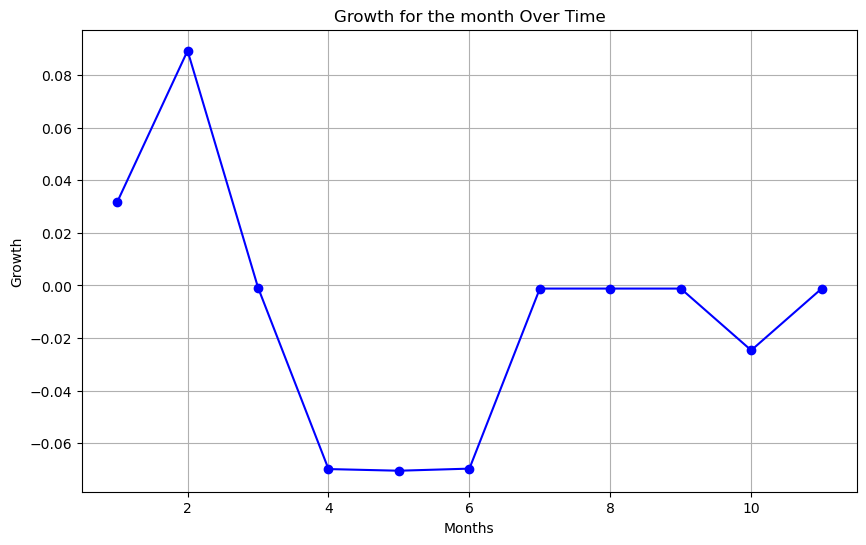

average monthly growth: -0.010847099933514091
average monthly growth standard deviation: 0.04790782813201519
investment_dates_5_years
Total money: 6495.940331937891


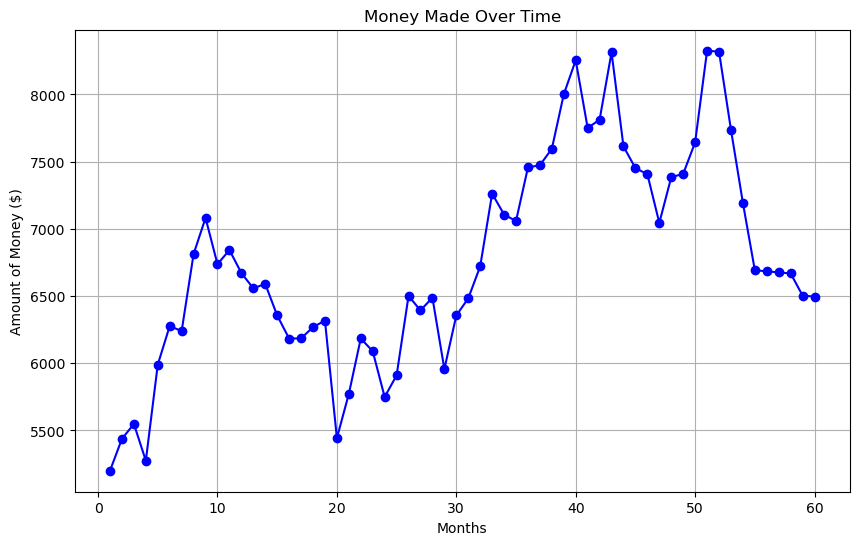

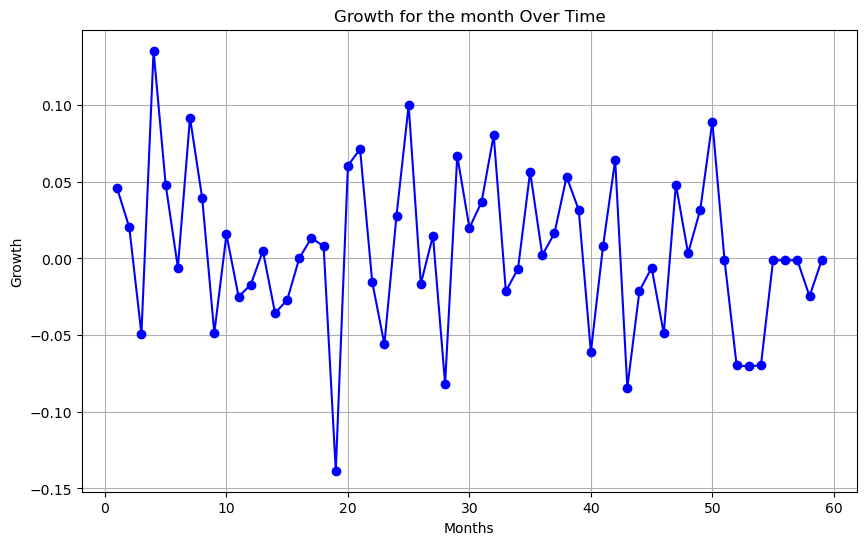

average monthly growth: 0.005083221448341242
average monthly growth standard deviation: 0.05154159393306248
investment_dates_10_years
Total money: 22191.700791515563


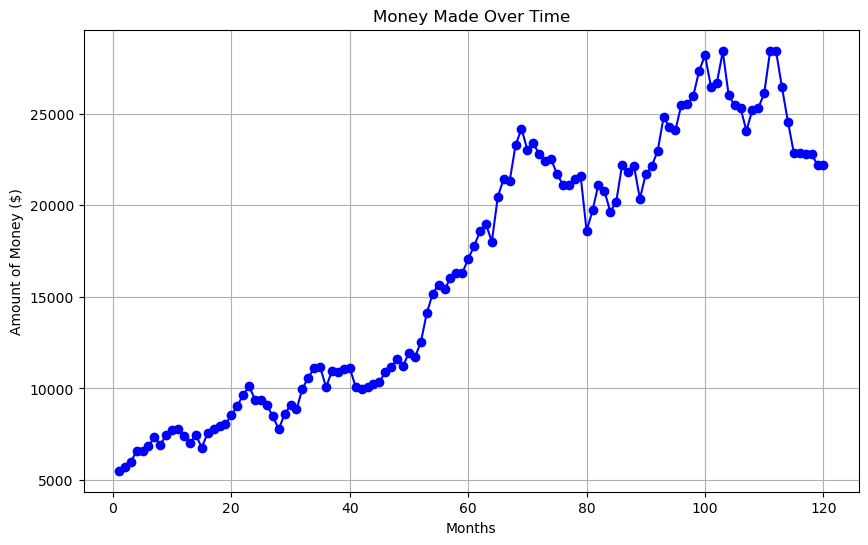

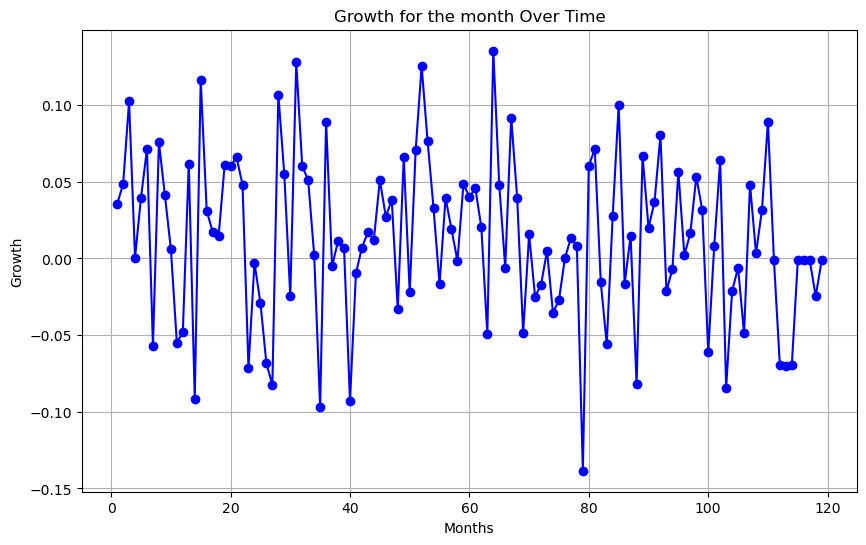

average monthly growth: 0.01320704906186305
average monthly growth standard deviation: 0.05363494880108082
investment_dates_19_years
Total money: 63375.85069610094


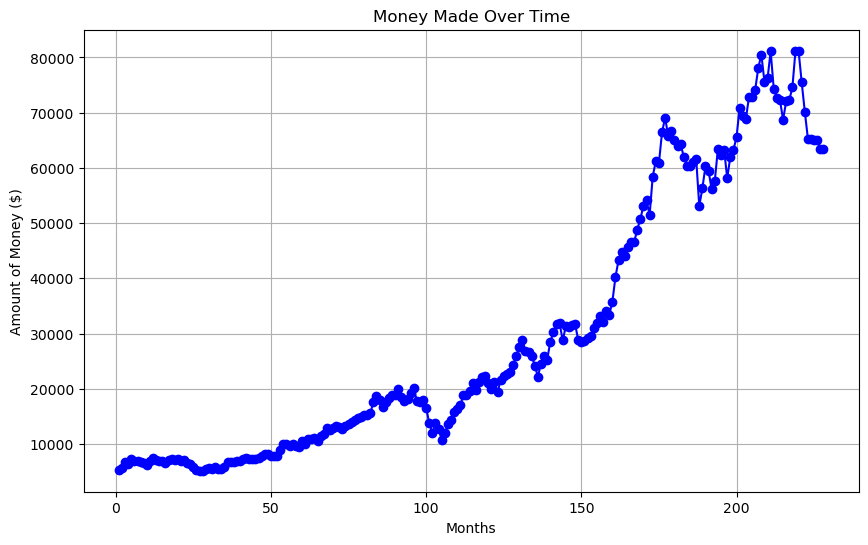

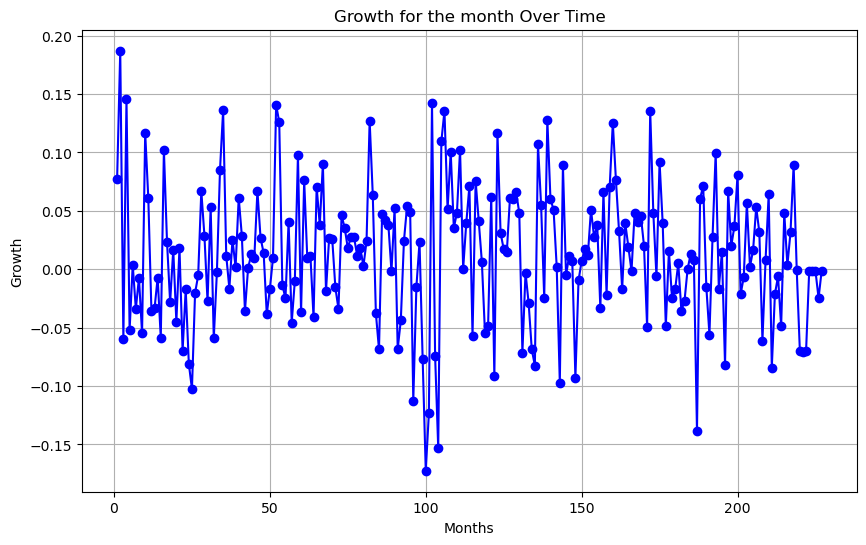

average monthly growth: 0.012752514755267683
average monthly growth standard deviation: 0.05933581231369412
10 companies chosen
investment_dates_1_year
Total money: 4608.444518655566


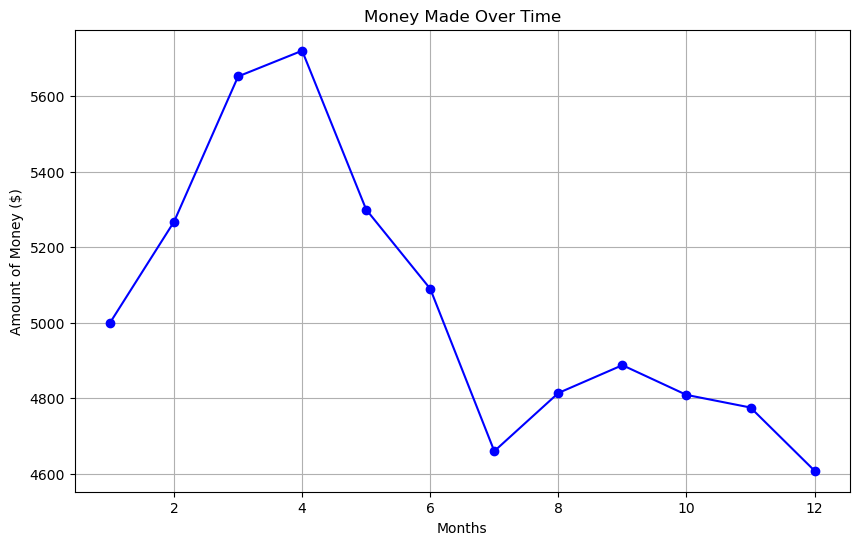

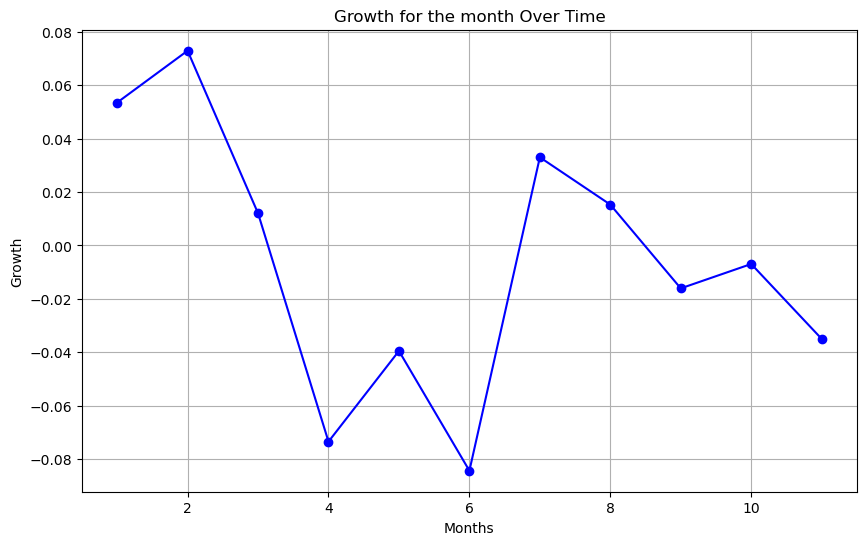

average monthly growth: -0.006241397671431917
average monthly growth standard deviation: 0.04984371690066725
investment_dates_5_years
Total money: 8569.424795018553


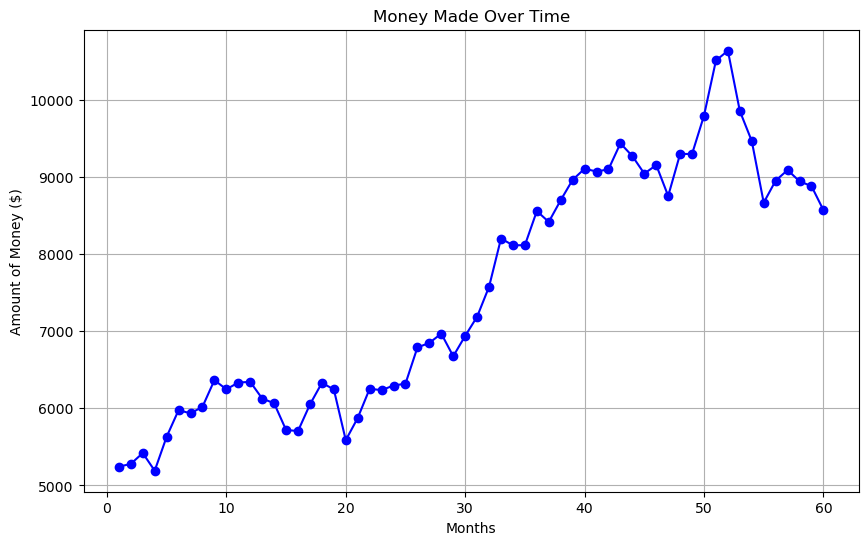

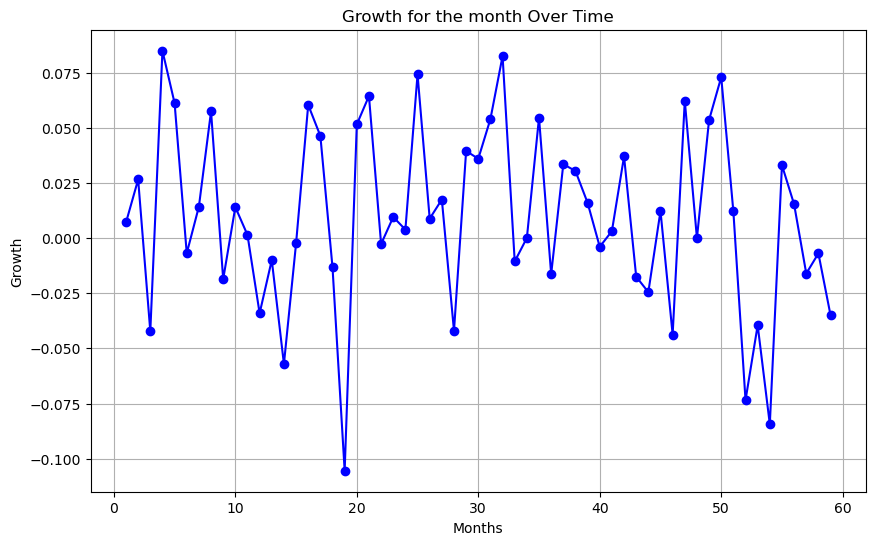

average monthly growth: 0.009217423704446451
average monthly growth standard deviation: 0.04162733833201328
investment_dates_10_years
Total money: 20971.31980848968


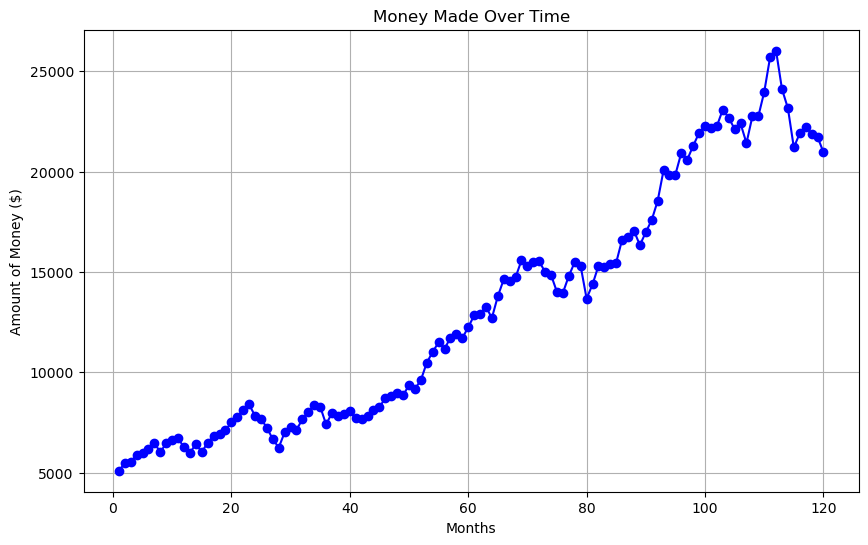

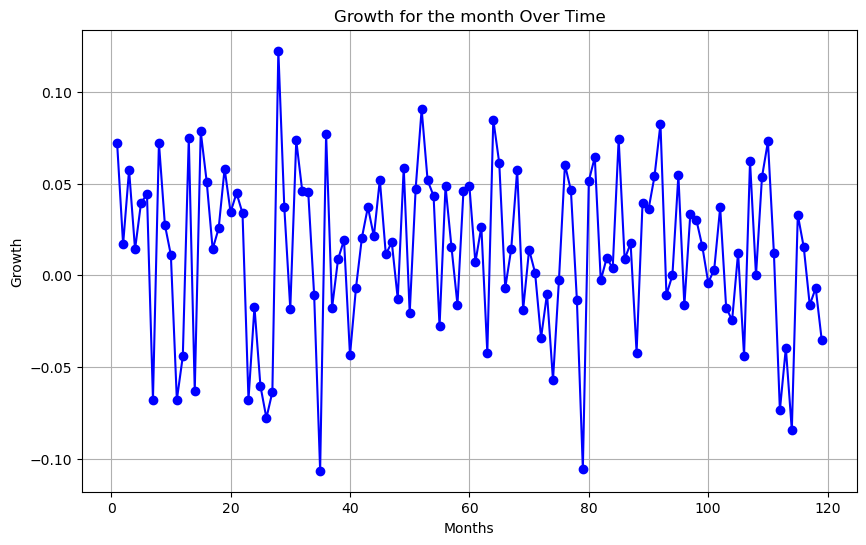

average monthly growth: 0.012977767181151121
average monthly growth standard deviation: 0.0450587526347293
investment_dates_19_years
Total money: 46080.63763313459


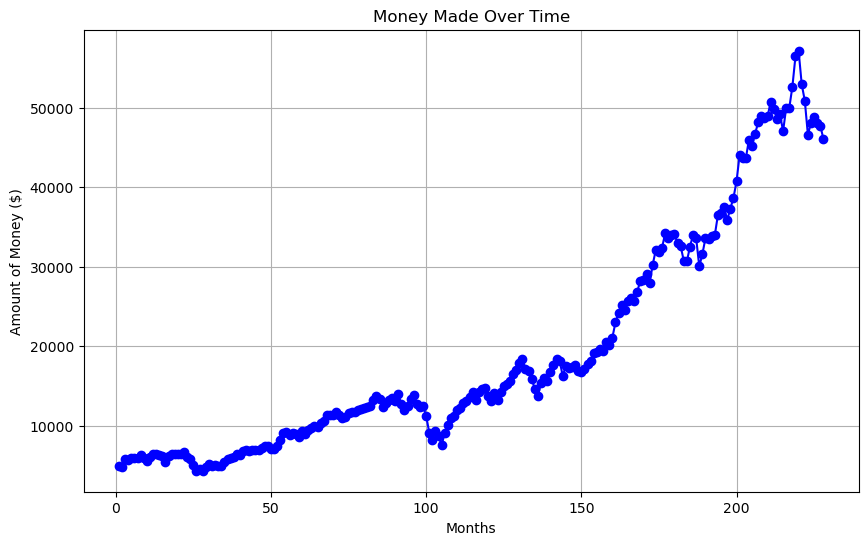

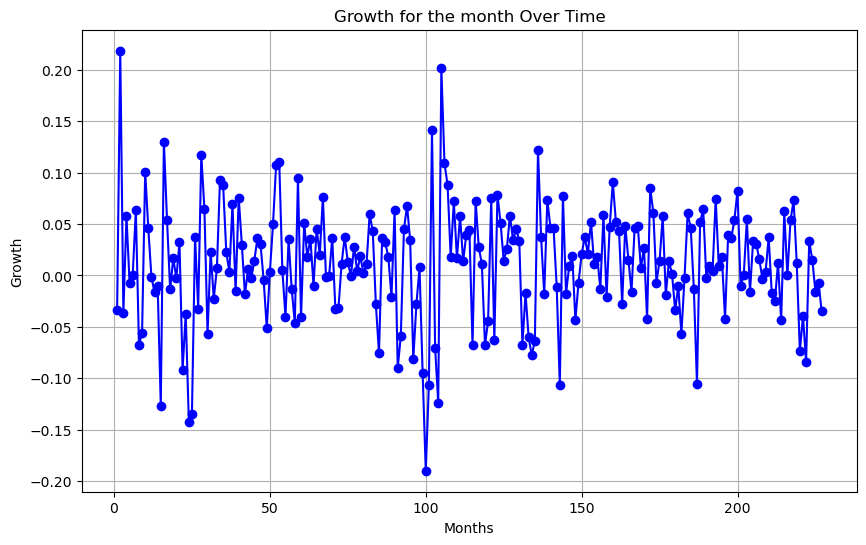

average monthly growth: 0.01142274815791029
average monthly growth standard deviation: 0.05630547637827028


In [40]:
investment_total_dates = []
names = ['investment_dates_1_year','investment_dates_5_years','investment_dates_10_years', 'investment_dates_19_years', 'full_time']
investment_total_dates.append(investment_dates_1_year)
investment_total_dates.append(investment_dates_5_years)
investment_total_dates.append(investment_dates_10_years)
investment_total_dates.append(investment_dates_19_years)
company_numbers = [5,10]
for n in company_numbers:
    print(n, 'companies chosen')
    counter = 0
    for i in investment_total_dates:
        print(names[counter])
        counter+=1
        investing_selling_decision_tree(i,n)

In [41]:
calculate_growth_rate(5000,15615690.33624501
,228)


1.0359222337214182

Hybrid experiment

In [44]:
def investing_selling_hybrid(investment_dates, number_of_companies):
    money_made_over_time = []
    avg_return_over_time = []
    total_money = 5000
    number_of_companies = number_of_companies
    for date in investment_dates:
        invest_date_index = investment_dates.index(date)
        selling_date_index = invest_date_index + 1
        if selling_date_index < len(investment_dates):
            invest_date = investment_dates[invest_date_index]
            selling_date = investment_dates[selling_date_index]
            chosen_companies = companies_chosen(invest_date,selling_date,number_of_companies)
            weighting_companies = companies_chosen_decision_tree(invest_date,selling_date,number_of_companies)
            intersection = set(chosen_companies).intersection(weighting_companies)
            weighted_stock = list(intersection)
            chosen_set = set(chosen_companies)
            weighting_set = set(weighting_companies)
            non_weighted_stock = list(chosen_set - weighting_set)
            money_to_invest_weighted = (total_money/len(chosen_companies))*2
            money_to_invest_weighted = money_to_invest_weighted - (0.0012*money_to_invest_weighted) #add a fee to invest
            money_to_invest_non_weighted = (total_money - len(weighted_stock) * money_to_invest_weighted) / len(non_weighted_stock)
            money_to_invest_non_weighted = money_to_invest_non_weighted - (0.0012*money_to_invest_non_weighted) #add a fee to invest
            start_date_row = df_1999_na.loc[df_1999_na['Date'] == invest_date]
            end_date_row = df_1999_na.loc[df_1999_na['Date'] == selling_date]
            start_companies_date_stock = start_date_row[weighted_stock].reset_index(drop=True)
            end_companies_date_stock = end_date_row[weighted_stock].reset_index(drop=True)
            money_made1 = ((money_to_invest_weighted/start_companies_date_stock) * end_companies_date_stock).sum().sum()
            start_date_row = df_1999_na.loc[df_1999_na['Date'] == invest_date]
            end_date_row = df_1999_na.loc[df_1999_na['Date'] == selling_date]
            start_companies_date_stock = start_date_row[non_weighted_stock].reset_index(drop=True)
            end_companies_date_stock = end_date_row[non_weighted_stock].reset_index(drop=True)
            money_made2 = ((money_to_invest_non_weighted/start_companies_date_stock) * end_companies_date_stock).sum().sum()
            money_made3 = money_made1 + money_made2
            total_money = money_made3
            money_made_over_time.append(total_money)
            money_made_over_time_df = pd.DataFrame({'returns': money_made_over_time})
            money_made_over_time_df = money_made_over_time_df.dropna()
            if len(money_made_over_time_df) >= 2:
                money_made_over_time_df = money_made_over_time_df[-2:]
                percentage_change = money_made_over_time_df['returns'].pct_change()
                percentage_change_df = percentage_change.to_frame(name='returns')
                percentage_change_df = percentage_change_df.dropna()
                avg_return_over_time.append(percentage_change_df['returns'].iloc[-1])
            if total_money <= 0:
                print('You broke!')
                break
    
    print('Total money:', total_money)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(money_made_over_time) + 1), money_made_over_time, linestyle='-', marker='o', color='b')
    plt.xlabel('Months')
    plt.ylabel('Amount of Money ($)')
    plt.title('Money Made Over Time')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(avg_return_over_time) + 1), avg_return_over_time, linestyle='-', marker='o', color='b')
    plt.xlabel('Months')
    plt.ylabel('Growth')
    plt.title('Growth for the month Over Time')
    plt.grid(True)
    plt.show()
    
    money_made_over_time_df = pd.DataFrame({'returns': money_made_over_time})
    money_made_over_time_df = money_made_over_time_df.dropna()
    percentage_change = money_made_over_time_df['returns'].pct_change()
    percentage_change = percentage_change.dropna()
    avg_return = percentage_change.mean()
    print('average monthly growth:', avg_return)
    std_dev = percentage_change.std()
    print('average monthly growth standard deviation:', std_dev)

5 companies chosen
investment_dates_1_year
Total money: 3496.44425748439


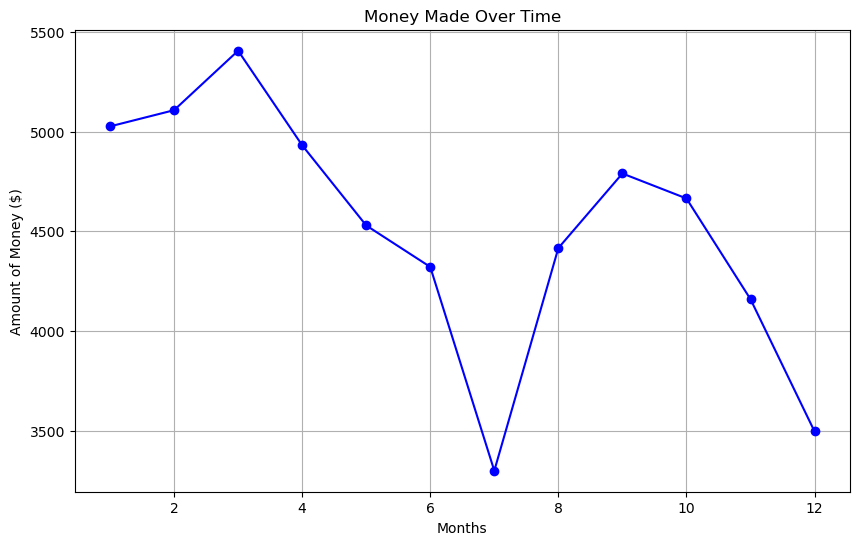

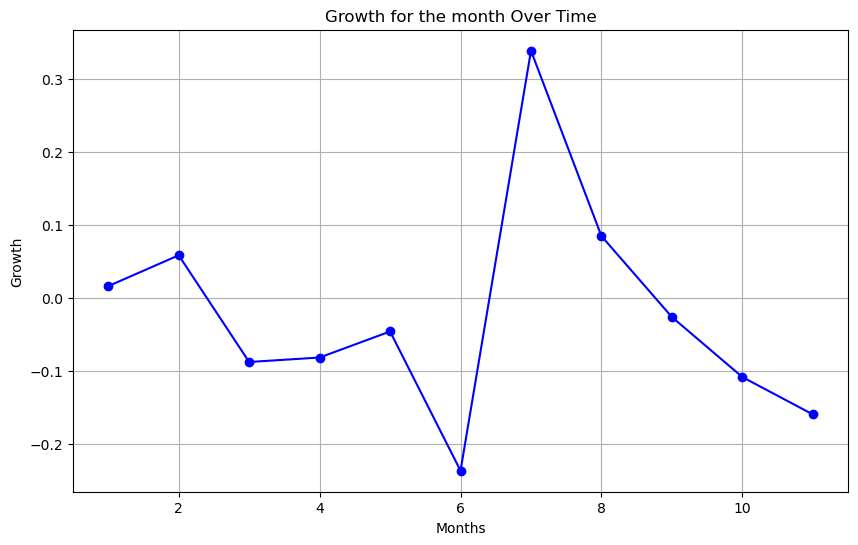

average monthly growth: -0.02253035764047593
average monthly growth standard deviation: 0.15162290468220707
investment_dates_5_years
Total money: 4903.322839037405


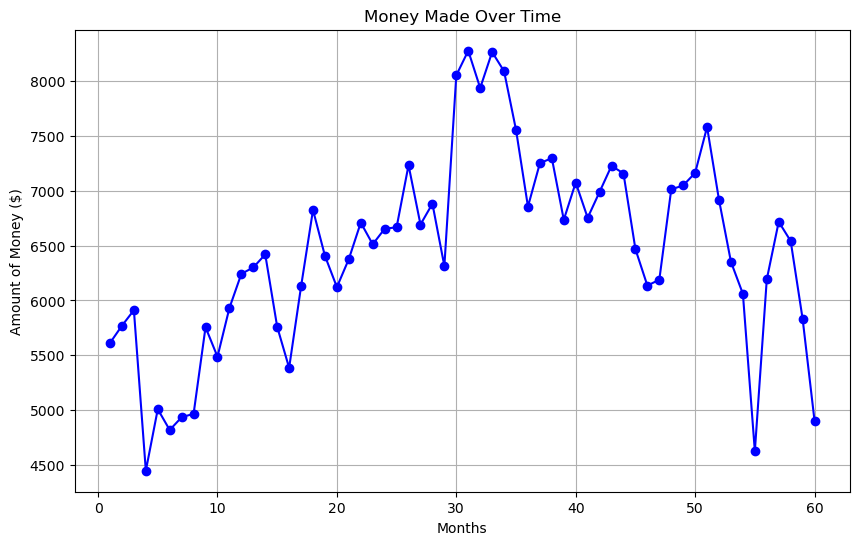

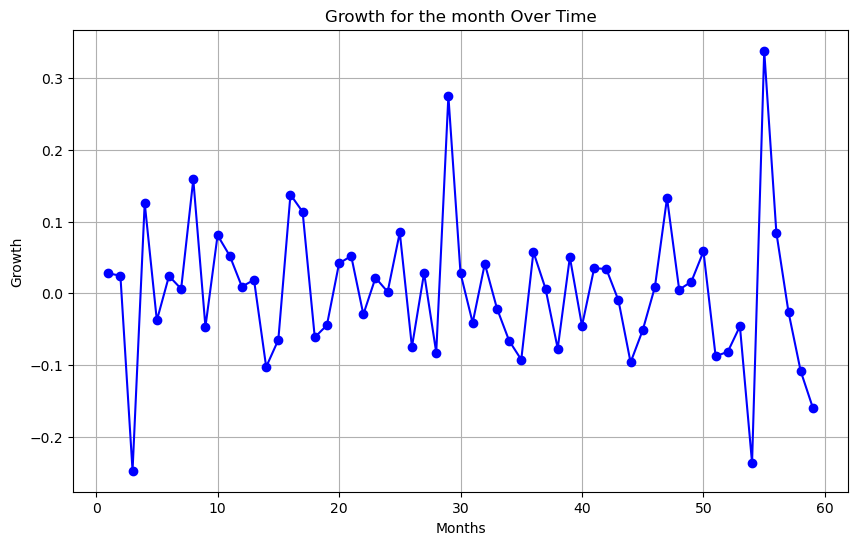

average monthly growth: 0.002467980274376417
average monthly growth standard deviation: 0.09919264970077539
investment_dates_10_years
Total money: 23272.230236929754


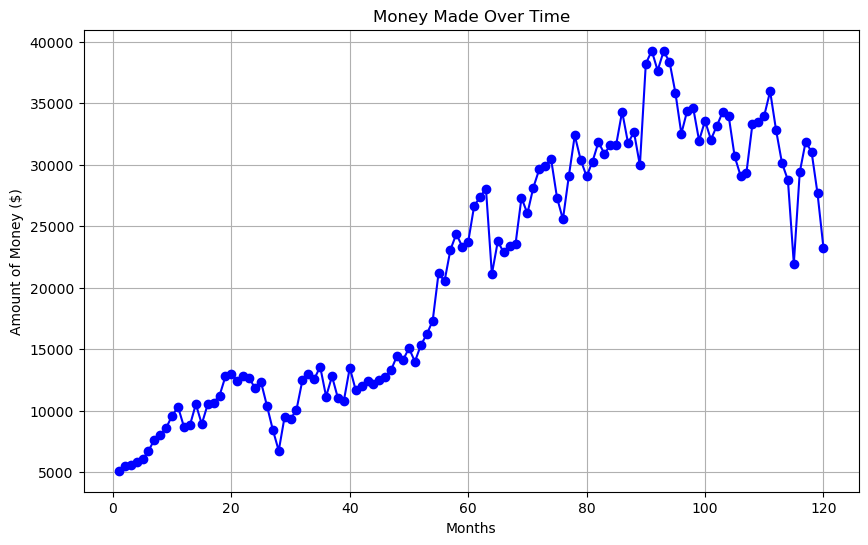

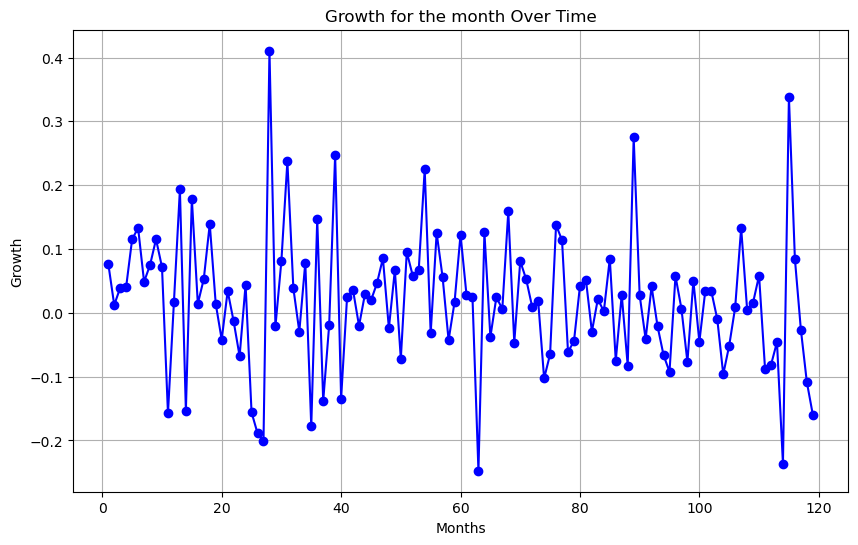

average monthly growth: 0.018373757763968827
average monthly growth standard deviation: 0.1076805841503695
investment_dates_19_years
Total money: 243871.6159114647


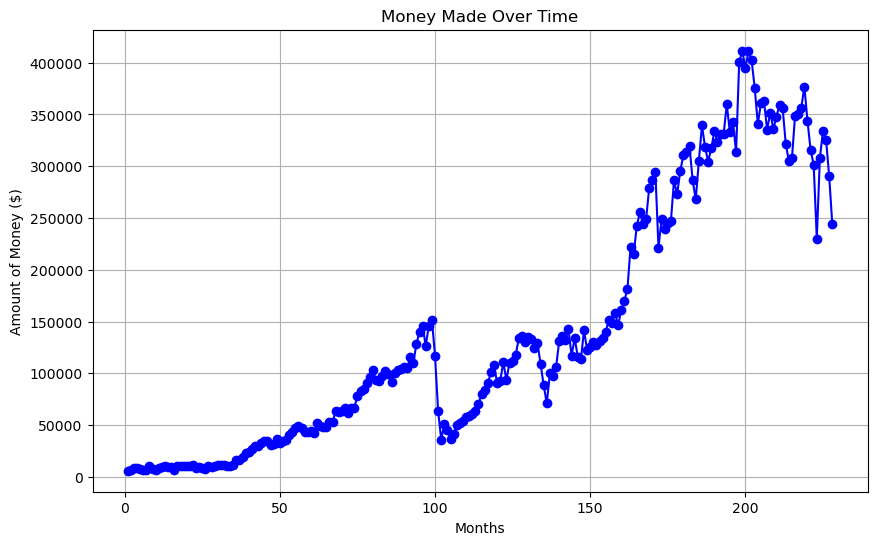

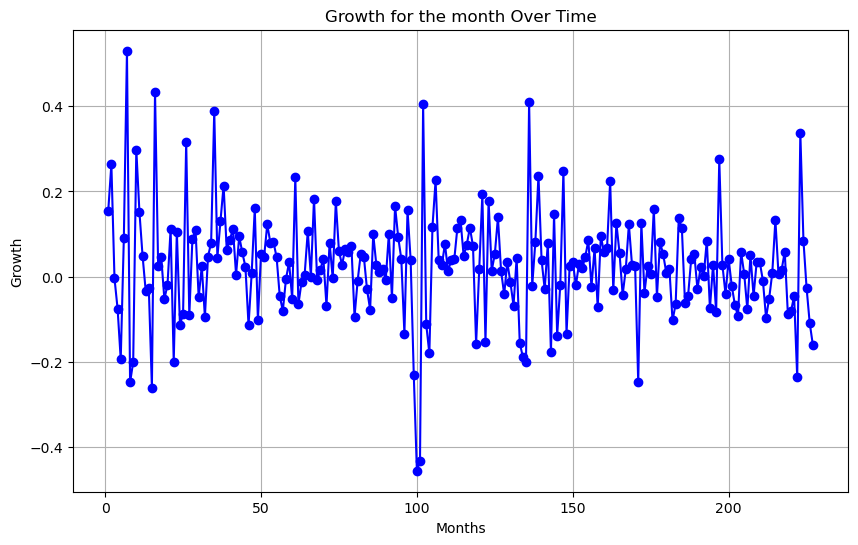

average monthly growth: 0.024838685512940484
average monthly growth standard deviation: 0.1292391025058026


In [45]:
investment_total_dates = []
names = ['investment_dates_1_year','investment_dates_5_years','investment_dates_10_years', 'investment_dates_19_years', 'full_time']
investment_total_dates.append(investment_dates_1_year)
investment_total_dates.append(investment_dates_5_years)
investment_total_dates.append(investment_dates_10_years)
investment_total_dates.append(investment_dates_19_years)
company_numbers = [5]
for n in company_numbers:
    print(n, 'companies chosen')
    counter = 0
    for i in investment_total_dates:
        print(names[counter])
        counter+=1
        investing_selling_hybrid(i,n)

import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import RMSprop 
model = Sequential() 
model.add(Dense(64, kernel_initializer = 'normal', activation = 'relu',input_shape = (1,))) 
model.add(Dense(64, activation = 'relu'))
model.add(Dense(484))
model.compile(
   loss = 'mse', 
   optimizer = RMSprop(), 
   metrics = ['mean_absolute_error']
)

def predict_stock_neural(invest_date, selling_date):
    stock_predictions = []
    df_1999_na.reset_index(drop=True, inplace=True)
    index_selling = df_1999_na[df_1999_na['Date'] == selling_date].index[0]
    index_invest = df_1999_na[df_1999_na['Date'] == invest_date].index[0]
    prediction_df = df_1999_na.reset_index(drop=False)  # Reset index and keep it as a column
    prediction_df = prediction_df.rename(columns={'index': 'DateNum'})
    prediction_value = prediction_df.loc[index_selling, 'DateNum']
    data = prediction_df.drop(columns=['Date', 'DateNum'])
    data = data.reset_index(drop=True)
    data_values = data
    data_values = data_values.reset_index(drop=False)  # Reset index and keep it as a column
    data_values = data_values.rename(columns={'index': 'Date'})
    X = data_values[index_invest - 365:index_invest + 1] # Use all data up to the investing point
    X = X['Date'].values
    y = data_values[index_invest - 365:index_invest + 1]
    y = y.drop(columns = ['Date']).values
    model.compile(
    loss = 'mse', 
    optimizer = RMSprop(), 
    metrics = ['mean_absolute_error']
    )
    # Train the linear regression model
    model.fit(
    X, y,     
    epochs = 100, 
    verbose = 1 )
    prediction_value = np.array(prediction_value).reshape(1, -1)
    stock_predictions = model.predict(prediction_value)[0]
    return stock_predictions

def companies_chosen_neural(invest_date,selling_date,number_of_companies):
    number_of_companies = n
    invest_date = invest_date
    selling_date = selling_date
    stock_predictions = predict_stock_neural(invest_date,selling_date)
    stock_at_invest = df_1999_na[df_1999_na['Date'] == invest_date]
    stock_at_invest = stock_at_invest.drop(columns = ['Date'])
    stock_increase_percent = (stock_predictions - stock_at_invest) / stock_at_invest * 100
    largest_column_names = stock_increase_percent.iloc[0].nlargest(n).index.tolist()
    return largest_column_names

def investing_selling_neural(investment_dates, number_of_companies):
    money_made_over_time = []
    total_money = 5000
    number_of_companies = number_of_companies
    for date in investment_dates:
        invest_date_index = investment_dates.index(date)
        selling_date_index = invest_date_index + 1
        if selling_date_index < len(investment_dates):
            invest_date = investment_dates[invest_date_index]
            selling_date = investment_dates[selling_date_index]
            chosen_companies = companies_chosen_neural(invest_date,selling_date,number_of_companies)
            money_to_invest = total_money / len(chosen_companies)
            money_to_invest = money_to_invest - (0.0012*money_to_invest) #add a fee to invest
            start_date_row = df_1999_na.loc[df_1999_na['Date'] == invest_date]
            end_date_row = df_1999_na.loc[df_1999_na['Date'] == selling_date]
            start_companies_date_stock = start_date_row[chosen_companies].reset_index(drop=True)
            end_companies_date_stock = end_date_row[chosen_companies].reset_index(drop=True)
            money_made = (money_to_invest/start_companies_date_stock) * end_companies_date_stock
            total_money = money_made.sum().sum()
            money_made_over_time.append(total_money)
            print(total_money)            
            if total_money <= 0:
                print('You broke!')
                break
    
    print('Total money:', total_money)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(money_made_over_time) + 1), money_made_over_time, linestyle='-', marker='o', color='b')
    plt.xlabel('Months')
    plt.ylabel('Amount of Money ($)')
    plt.title('Money Made Over Time')
    plt.grid(True)
    plt.show()
    
    money_made_over_time_df = pd.DataFrame({'returns': money_made_over_time})
    money_made_over_time_df = money_made_over_time_df.dropna()
    percentage_change = money_made_over_time_df['returns'].pct_change()
    percentage_change = percentage_change.dropna()
    avg_return = percentage_change.mean()
    print('average monthly growth:', avg_return)
    std_dev = percentage_change.std()
    print('average monthly growth standard deviation:', std_dev)

'''
investment_total_dates = []
names = ['investment_dates_19_years']
investment_total_dates.append(investment_dates_19_years)
company_numbers = [5]
for n in company_numbers:
    print(n, 'companies chosen')
    counter = 0
    for i in investment_total_dates:
        print(names[counter])
        counter+=1
        investing_selling_neural(i,n)
'''

calculate_growth_rate(5000,15615690.33624501
,228)